In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter
from scipy.io import loadmat
import SVBfunc
from matplotlib.gridspec import GridSpec
import pylab as pl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cmocean
from os.path import exists



In [2]:
corrinds=[30.49,30.77,31.13,31.69,32.11,32.65,33.02]

hej=[35,54,79,120,154,194,219]

VAR=['PHIHYD','VVEL','UVEL'] #,'WVEL']
FILT=['no','filt']

filt=FILT[1]
var=VAR[0]
coast='smooth'


ik=3
day1=0

In [40]:
ds=[]

for lat in corrinds:
    ds.append(xr.open_dataset(str(coast)+'/'+ str(var)+'/LinReg' + str(lat) + str(filt)+ '.nc'))


In [75]:
from xmitgcm import open_mdsdataset

In [78]:
	levels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
		11, 12, 13, 14, 15, 16, 17,
		18, 19, 20, 21, 22, 23, 24, 25,
		26, 27, 28, 29, 30, 31,
		32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
		45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,
		58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
		74, 79, 84, 89, 94, 99, ]
    
dsBase = open_mdsdataset('Base',default_dtype='>f4', levels=levels)
                         
                         

/opt/anaconda3/envs/notebook/lib/python3.11/site-packages/xmitgcm/mds_store.py:913: UserWarning: Couldn't find available_diagnostics.log in Base or Base. Using default version.
  warnings.warn("Couldn't find available_diagnostics.log "


In [79]:
dsBase

<xarray.Dataset>
Dimensions:  (XC: 512, YC: 612, XG: 512, YG: 612, Z: 76, Zp1: 77, Zu: 76,
              Zl: 76, time: 1)
Coordinates: (12/37)
  * XC       (XC) >f8 238.0 238.0 238.0 238.1 238.1 ... 245.9 245.9 246.0 246.0
  * YC       (YC) >f8 27.01 27.02 27.03 27.05 27.06 ... 35.28 35.29 35.3 35.32
  * XG       (XG) >f8 238.0 238.0 238.0 238.0 238.1 ... 245.9 245.9 246.0 246.0
  * YG       (YG) >f8 27.0 27.01 27.03 27.04 27.05 ... 35.27 35.28 35.3 35.31
  * Z        (Z) >f8 -3.0 -5.0 -7.0 -9.0 ... -2.634e+03 -3.45e+03 -4.565e+03
  * Zp1      (Zp1) float64 -2.0 -4.0 -6.0 -8.0 ... -3.355e+03 -4.43e+03 nan
    ...       ...
    dxF      (YC, XC) >f8 dask.array<chunksize=(612, 512), meta=np.ndarray>
    dyU      (YG, XG) >f8 dask.array<chunksize=(612, 512), meta=np.ndarray>
    maskInS  (YG, XC) bool dask.array<chunksize=(612, 512), meta=np.ndarray>
    dyF      (YC, XC) >f8 dask.array<chunksize=(612, 512), meta=np.ndarray>
  * time     (time) timedelta64[ns] 07:42:00
    iter     (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
Data variables:
    PHIHYD   (time, Z, YC, XC) >f8 dask.array<chunksize=(1, 76, 612, 512), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    title:        netCDF wrapper of MITgcm MDS binary data
    source:       MITgcm

In [113]:
indYlat

array([335, 334, 333, 332, 331, 330, 329, 328, 327, 326, 325, 324, 323,
       322, 321, 320, 319, 318, 317, 316, 315, 314, 313, 312, 311, 310,
       309, 308, 307, 306, 305, 304, 303, 302, 301, 300, 299, 298, 297,
       296, 295, 294, 293, 292, 291, 290, 289, 288, 287, 286, 285, 284,
       283, 282])

In [81]:

hFacC = dsBase.hFacC

hfa = np.ma.masked_values(hFacC, 0)
maskin = np.ma.getmask(hfa)


In [10]:
matfile=loadmat(str(coast)+'/BT_P.mat')
mask=maskin[:,indYlat,indXlon]
indXlon,indYlat=matfile['indexXlon'][ik],matfile['indexYlat'][ik]

In [24]:
params = {'font.size': 16,
          'figure.figsize': (10, 10),
         'font.family':'sans'}
pl.rcParams.update(params)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [3]:
u,v,w,r,p,k,omega,epe,eke,xgr,zgr = SVBfunc.openBrink(30.49,coast)

In [8]:
omega/k

/var/folders/gd/3bct0xc153g57jtc04sdbb240000gn/T/ipykernel_3422/1613612208.py:1: RuntimeWarning: invalid value encountered in divide
  omega/k


array([         nan, 209.54882813, 106.69921875,  72.55371094,
        54.80664062,  40.09375   ,          nan,  29.28515625,
                nan,          nan,  20.05664062,          nan,
                nan,  14.27783203,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan])

In [9]:
u,v,w,r,p,k,omega,epe,eke,xgr,zgr = SVBfunc.openBrink(30.77,coast)

In [10]:
omega/k

/var/folders/gd/3bct0xc153g57jtc04sdbb240000gn/T/ipykernel_3422/1613612208.py:1: RuntimeWarning: invalid value encountered in divide
  omega/k


array([1231.171875  ,  213.3125    ,  115.9765625 ,   72.29003906,
         51.24023437,   38.62890625,   29.94140625,           nan,
                 nan,           nan,   18.04296875,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan])

In [11]:
1/k

/var/folders/gd/3bct0xc153g57jtc04sdbb240000gn/T/ipykernel_3422/3367305828.py:1: RuntimeWarning: divide by zero encountered in divide
  1/k


array([16501184.49976771,  4400315.86660472,  2750197.41662795,
        2475177.67496516,  1650118.44997677,  1100078.96665118,
         825059.22498839,               inf,               inf,
                     inf,  5500394.8332559 ,               inf,
                     inf,               inf,               inf,
                     inf,               inf,               inf,
                     inf,               inf,               inf,
                     inf,               inf,               inf,
                     inf])

In [61]:
valsin=p
clabelB='Pressure [Pa]'
modes=0
modenr=[]
vals=[]
for i in range(len(valsin)):
    if np.any(valsin[i]!=0):
        modenr.append(i)
        modes=modes+1
        if np.logical_or(var == 'WVEL',var== 'UVEL'):
            vals.append(valsin[i].imag)
        else:
            vals.append(valsin[i])

In [63]:
modes

8

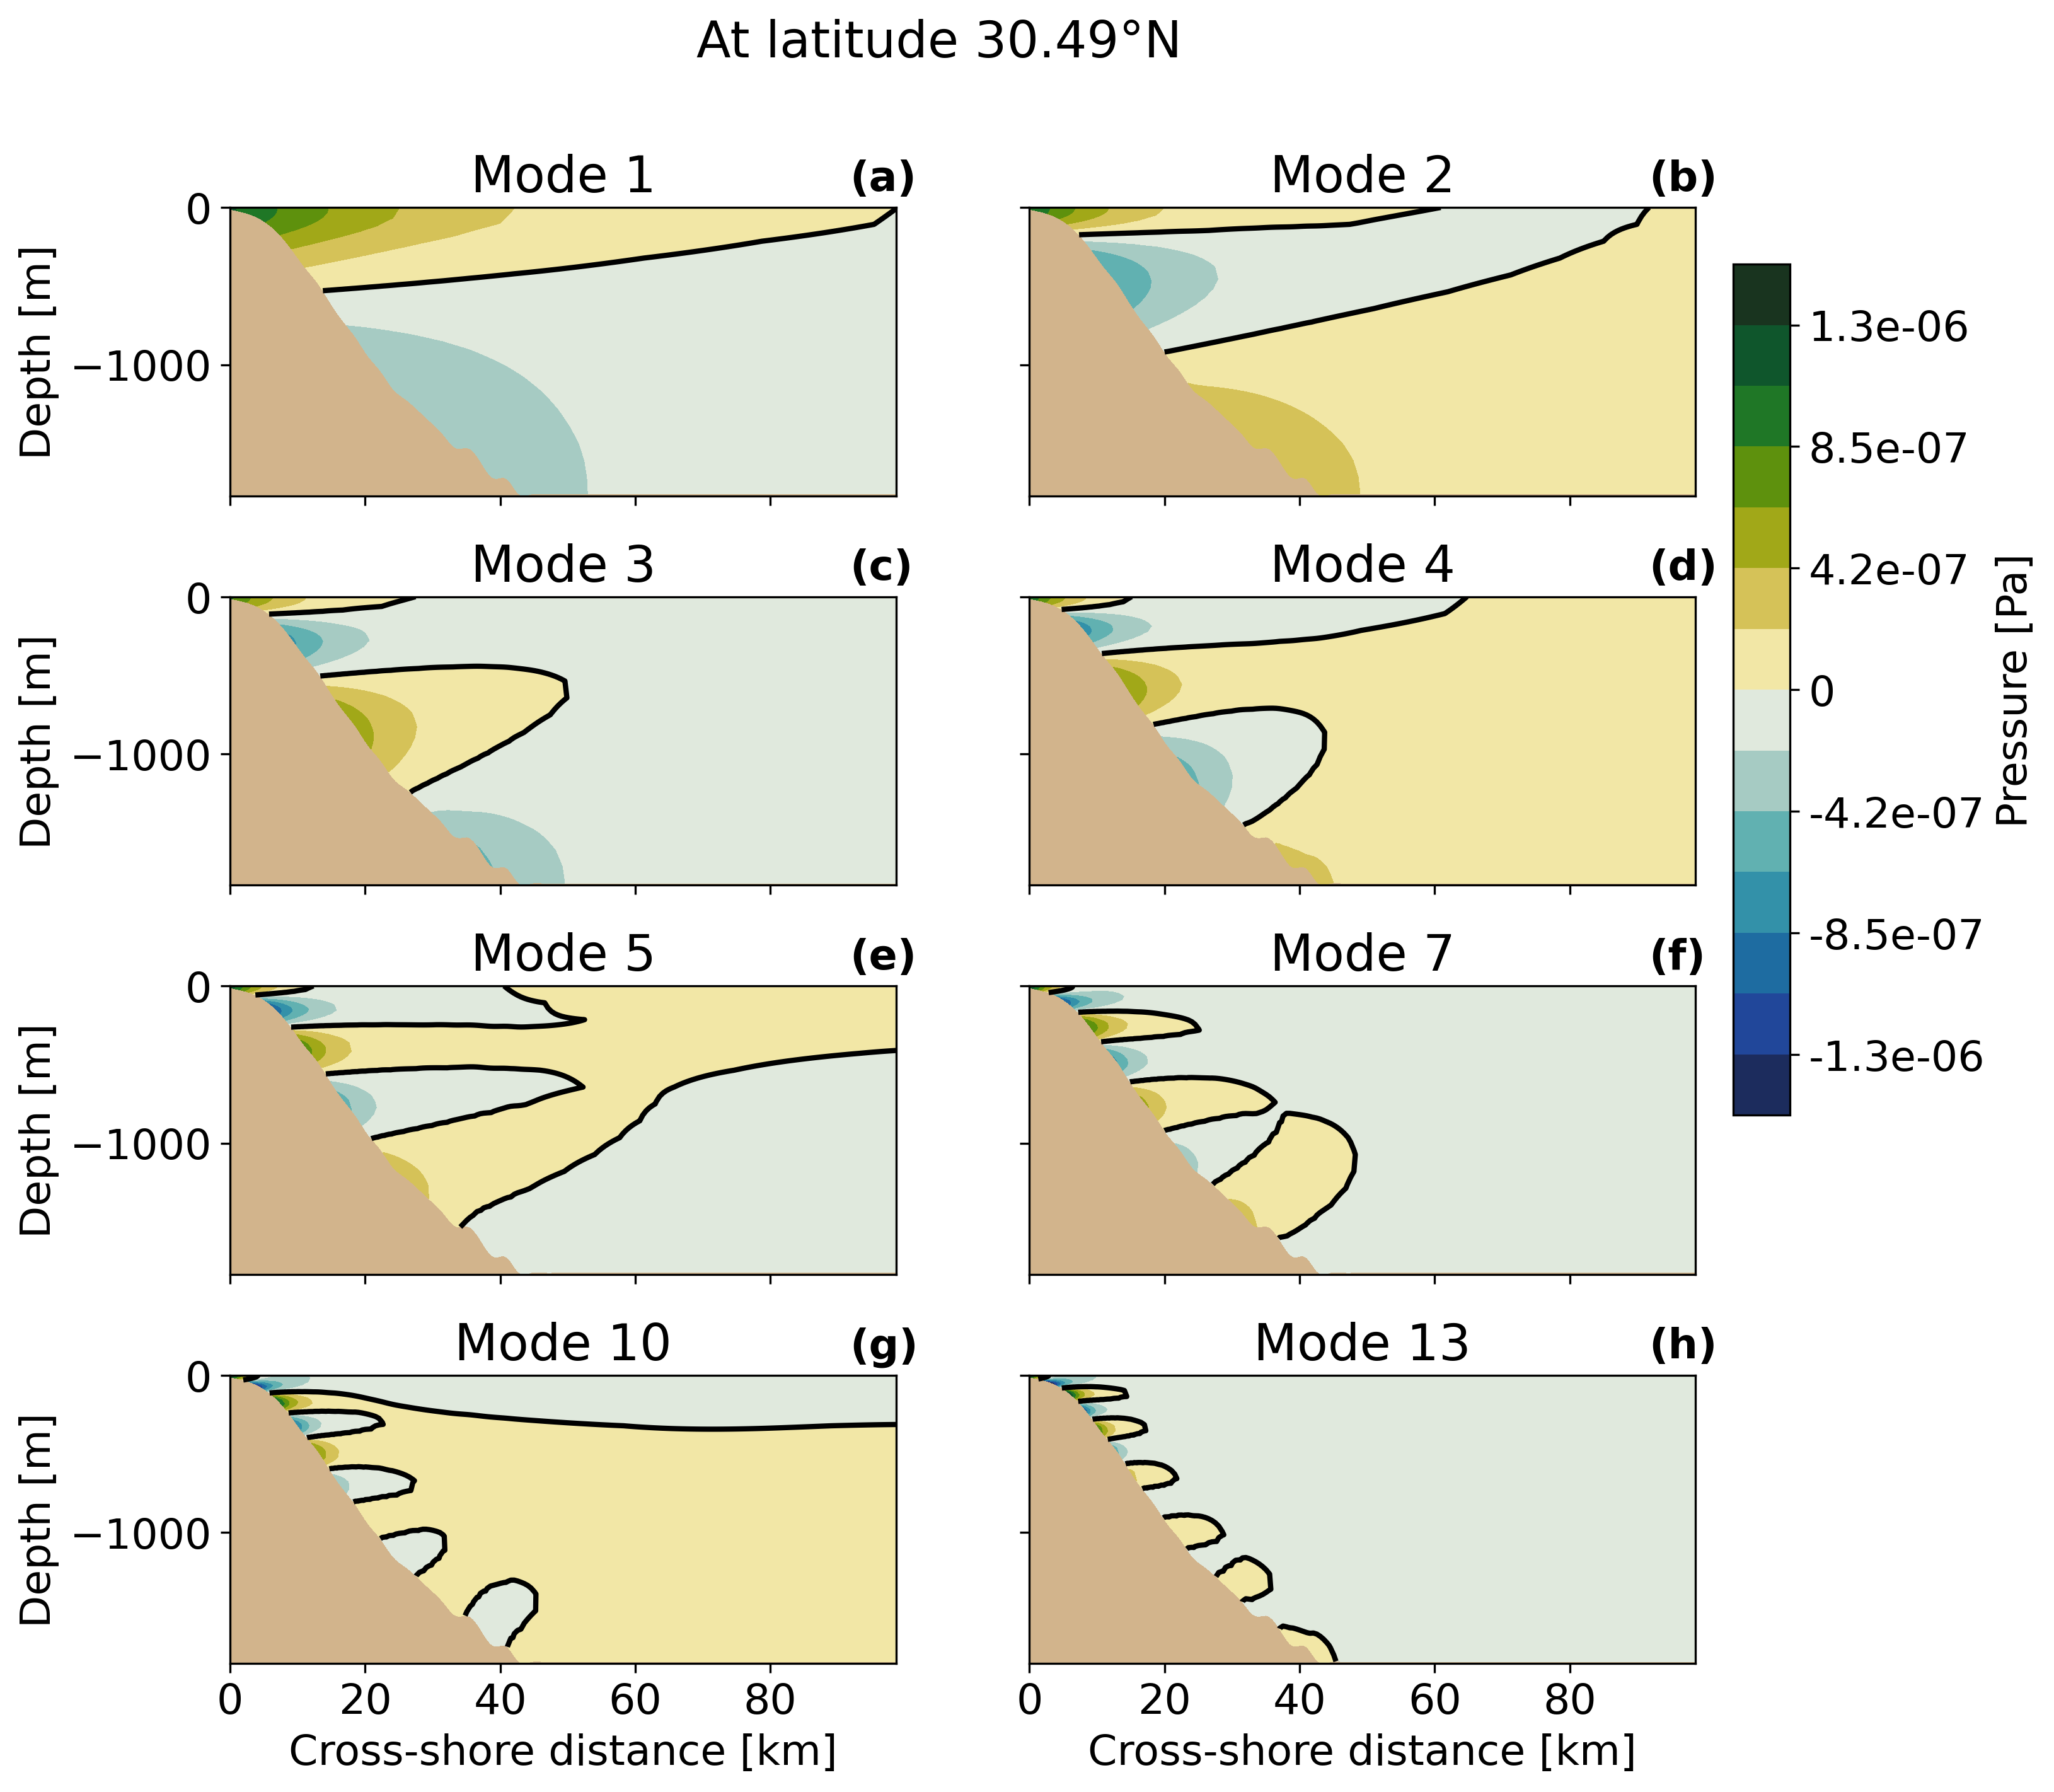

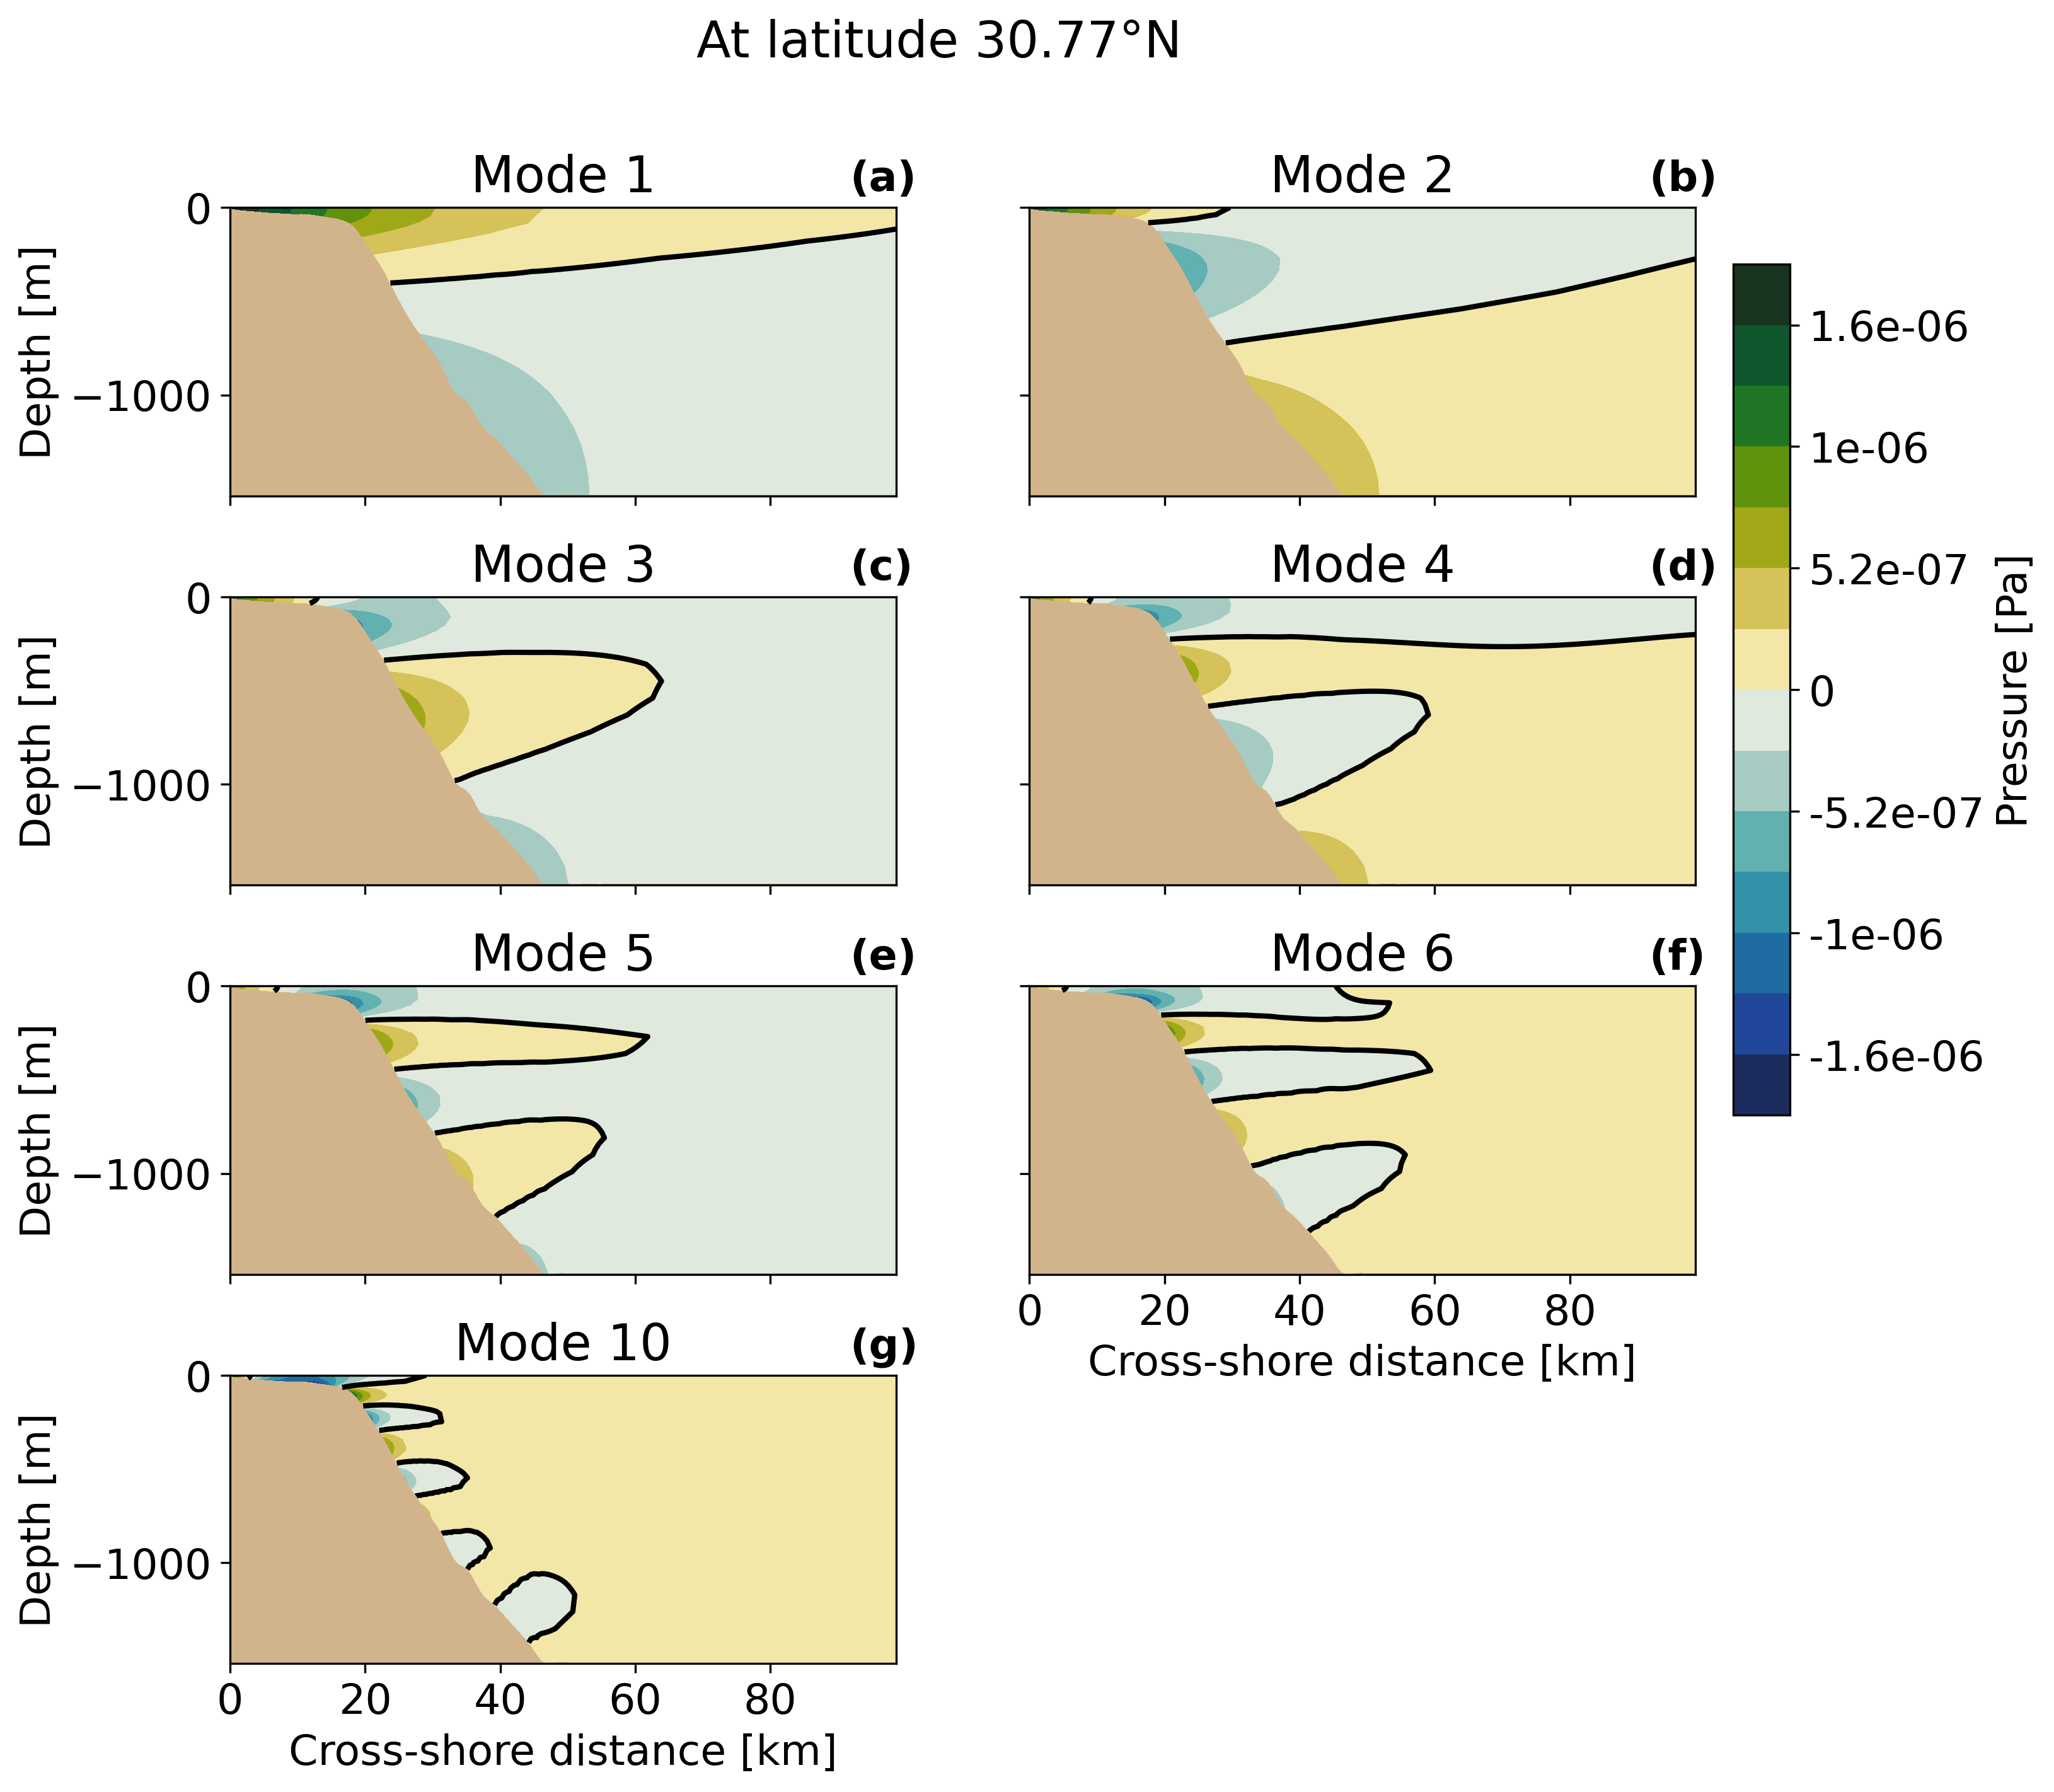

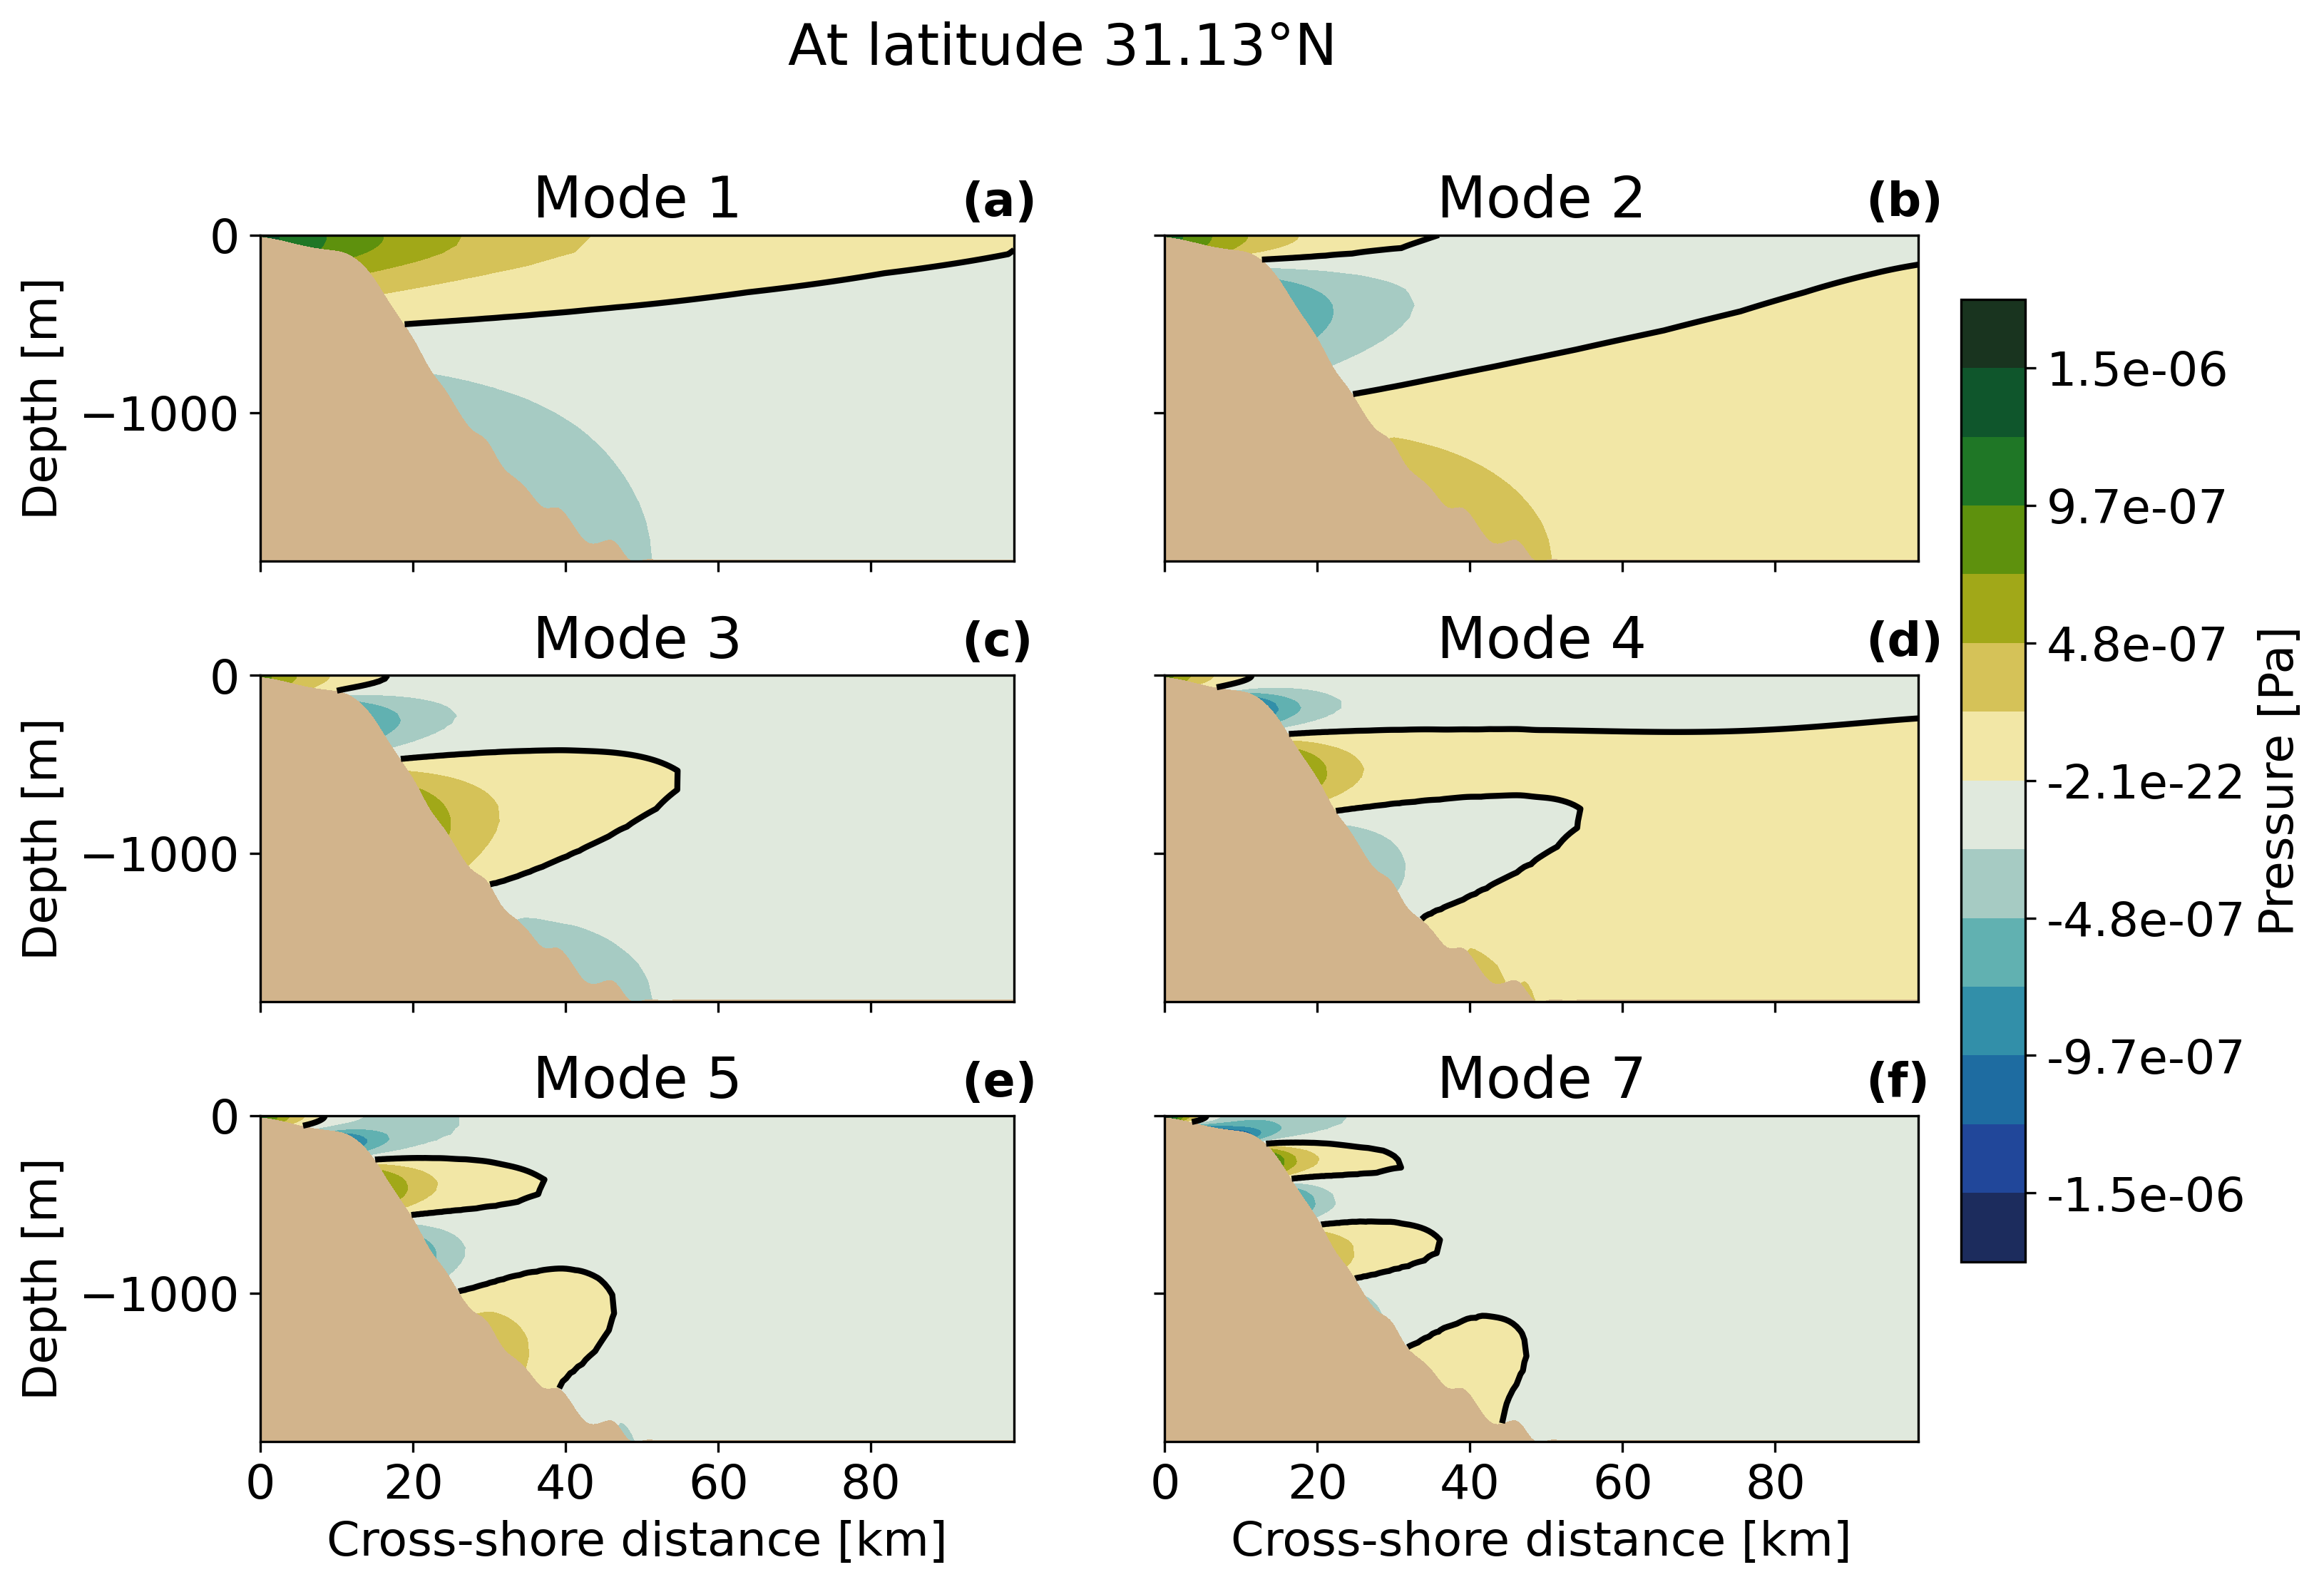

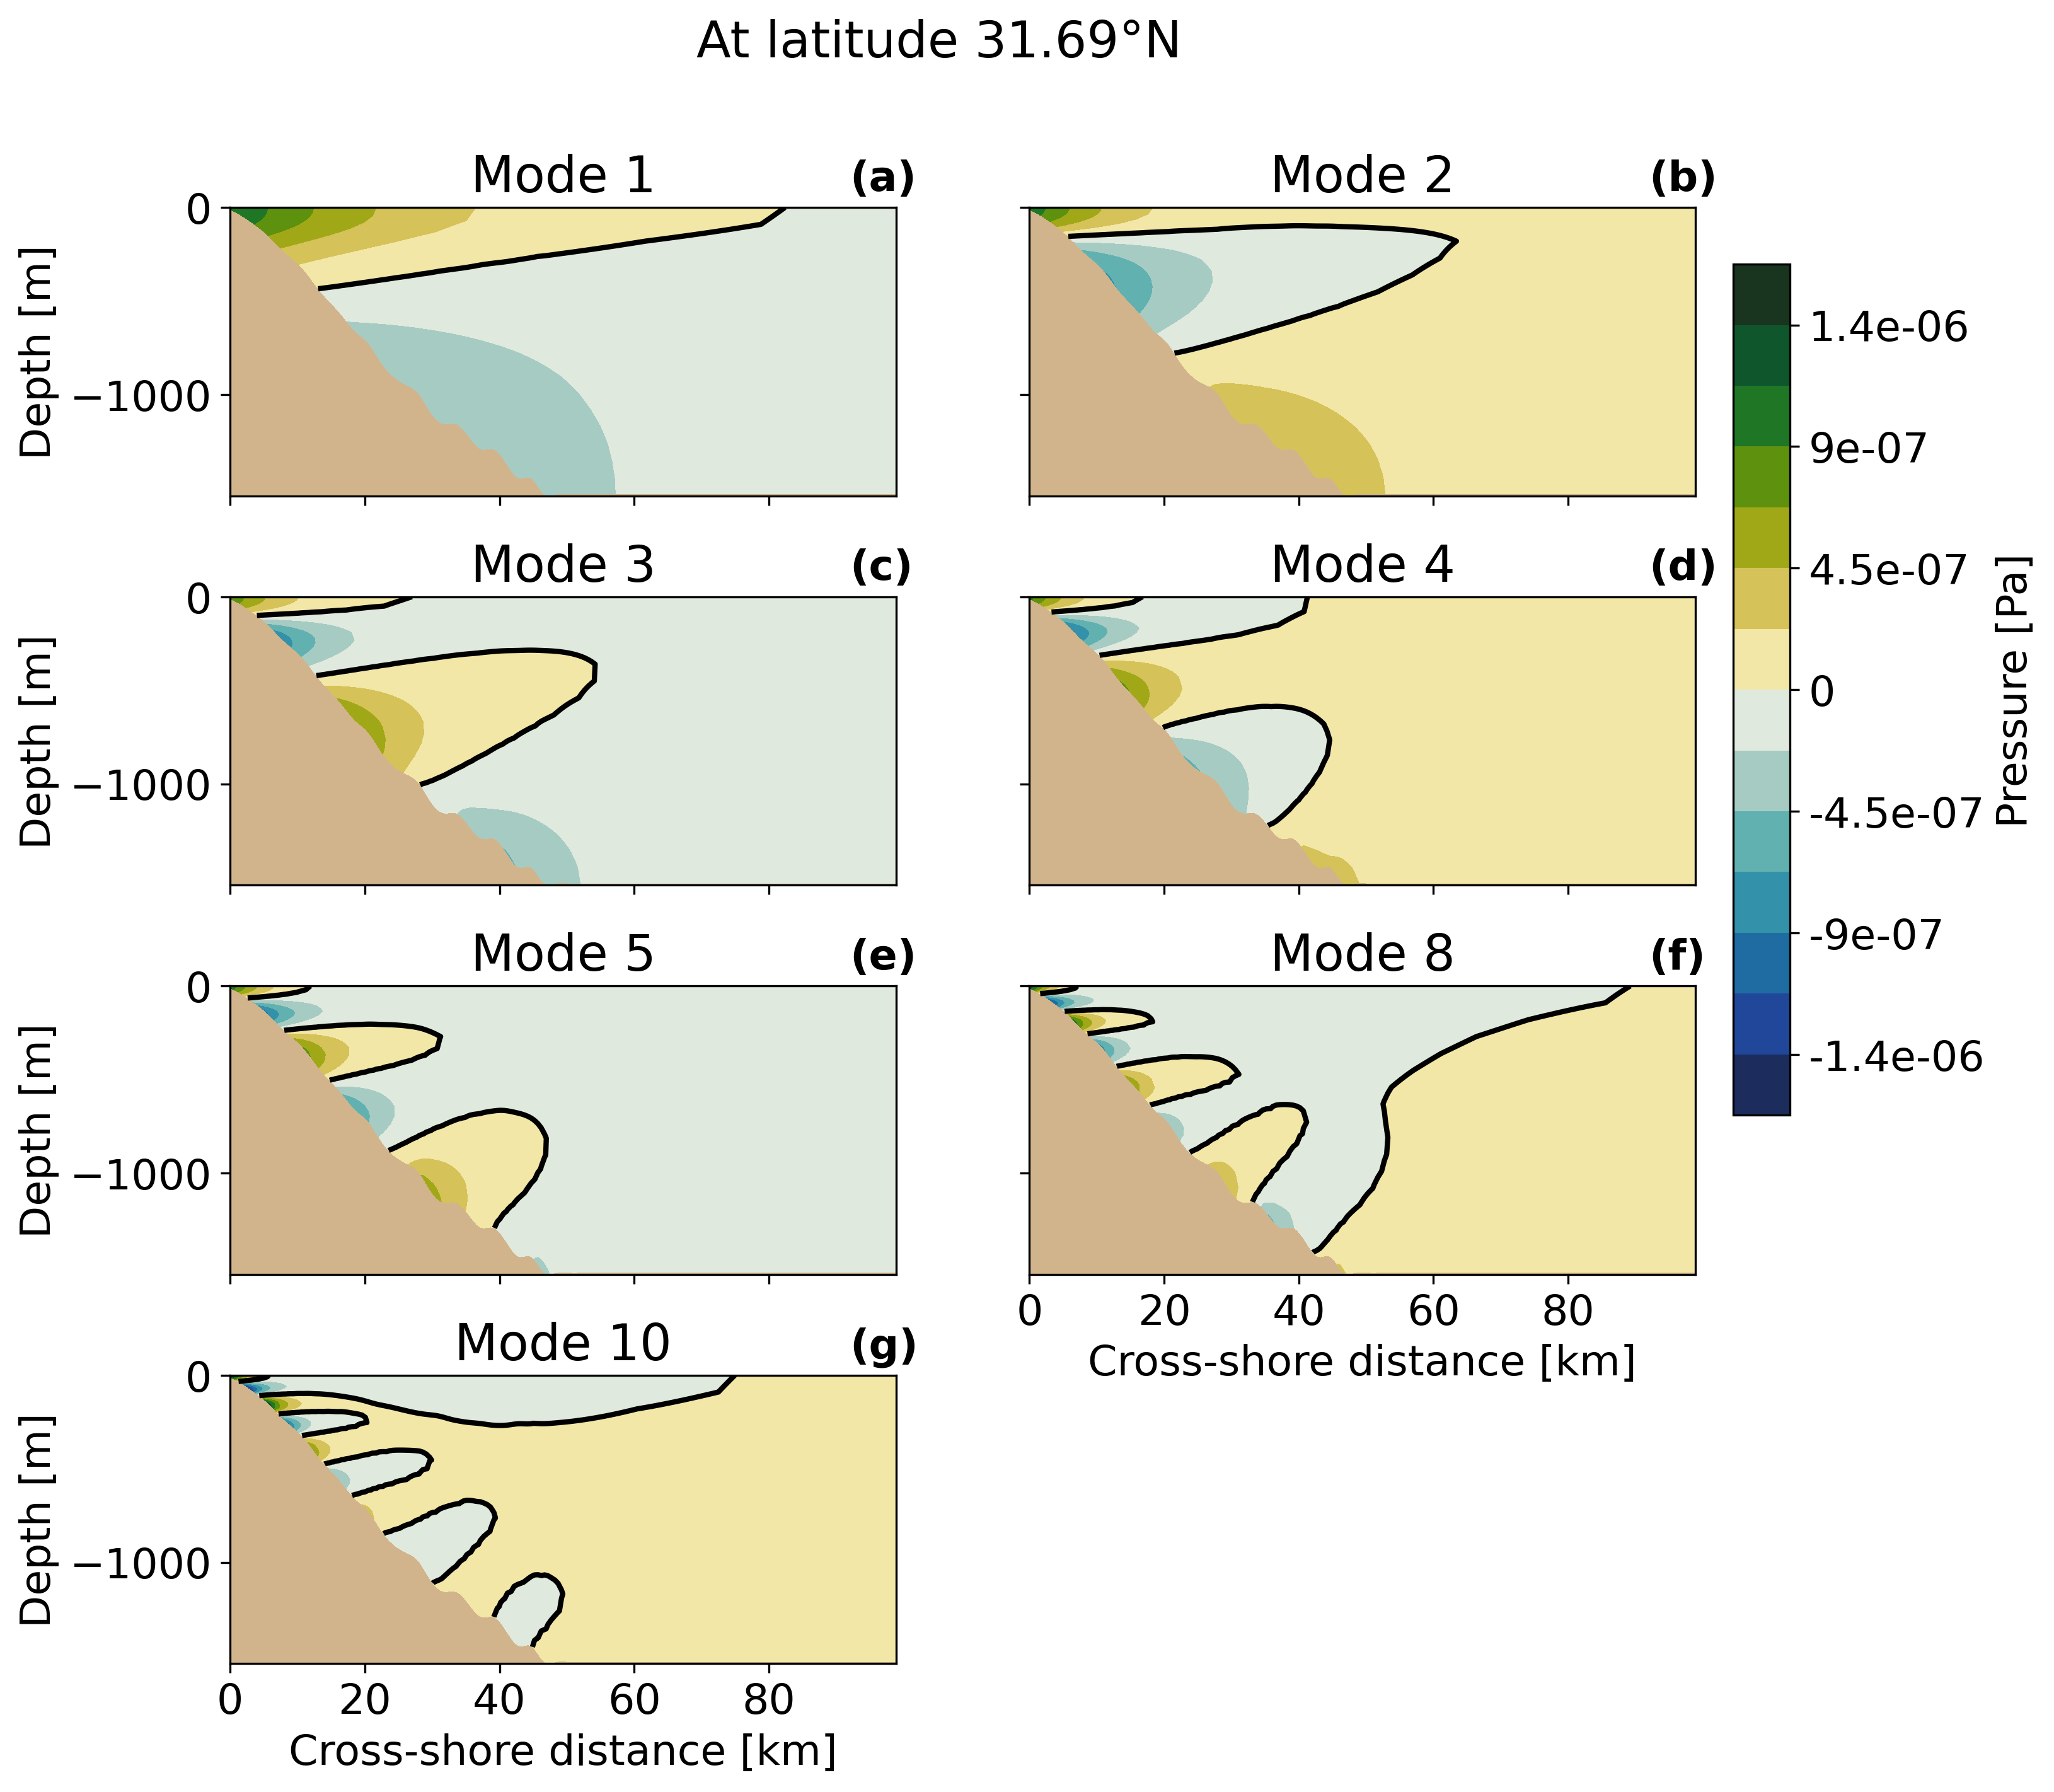

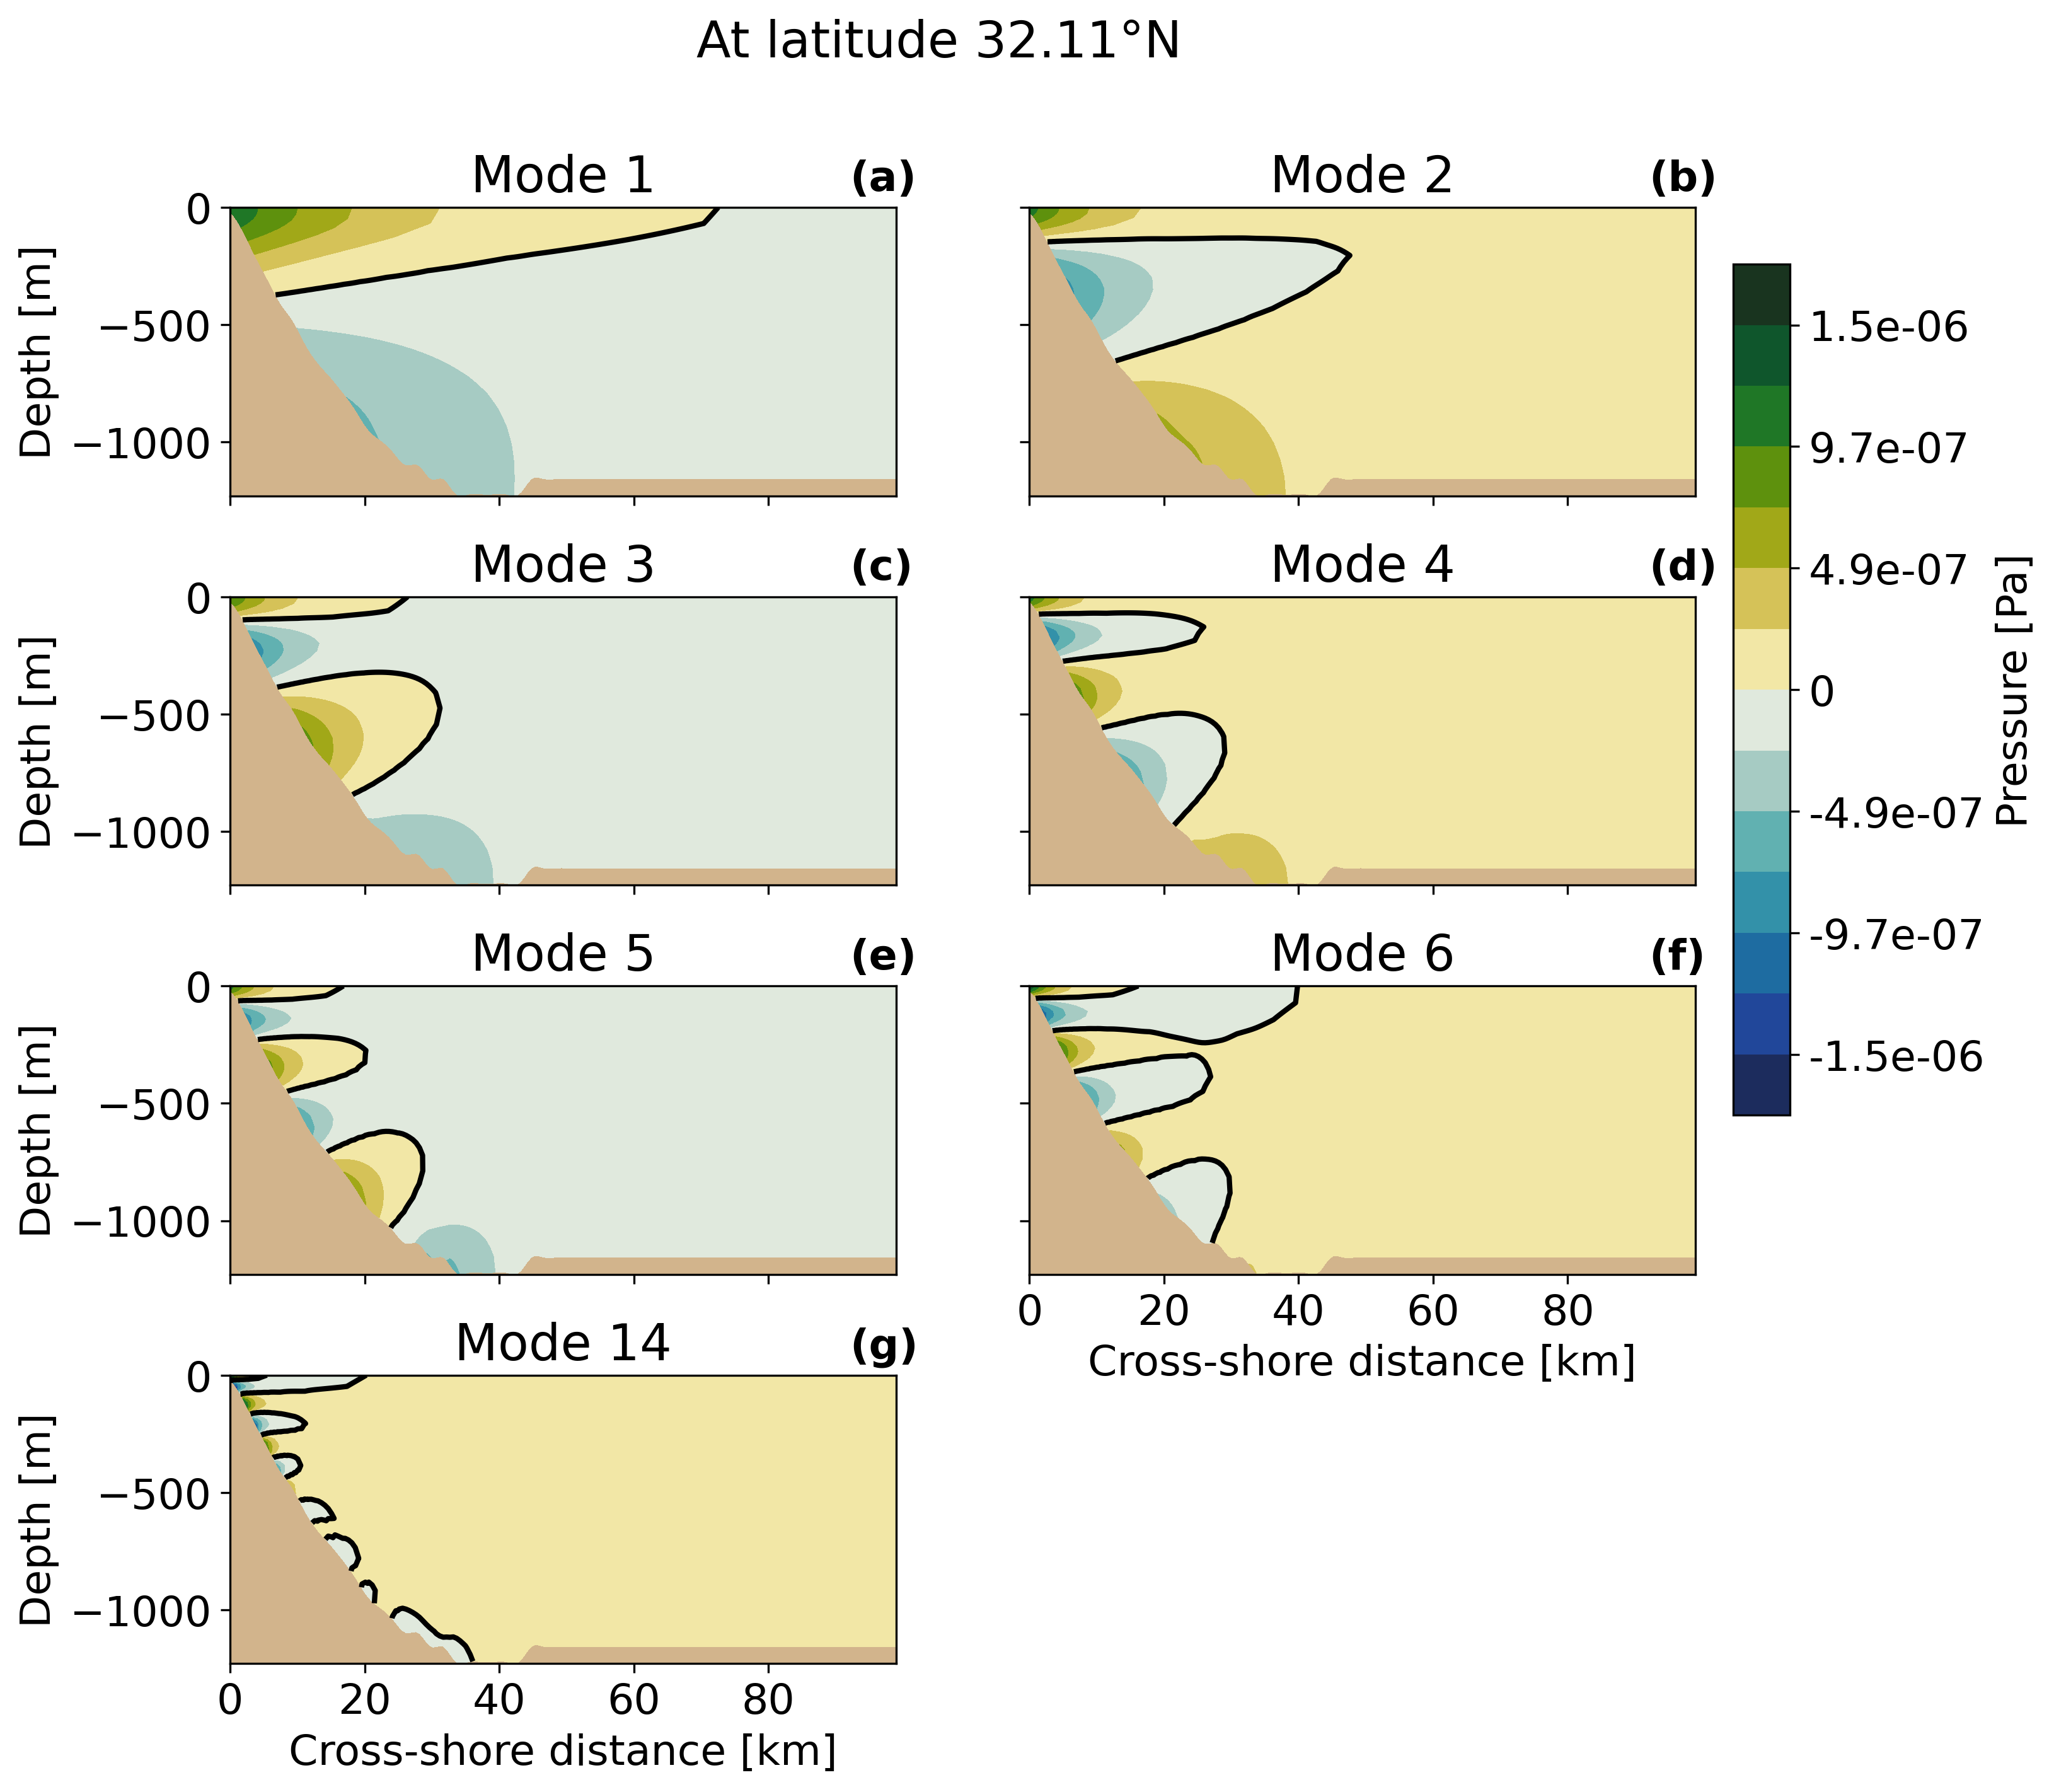

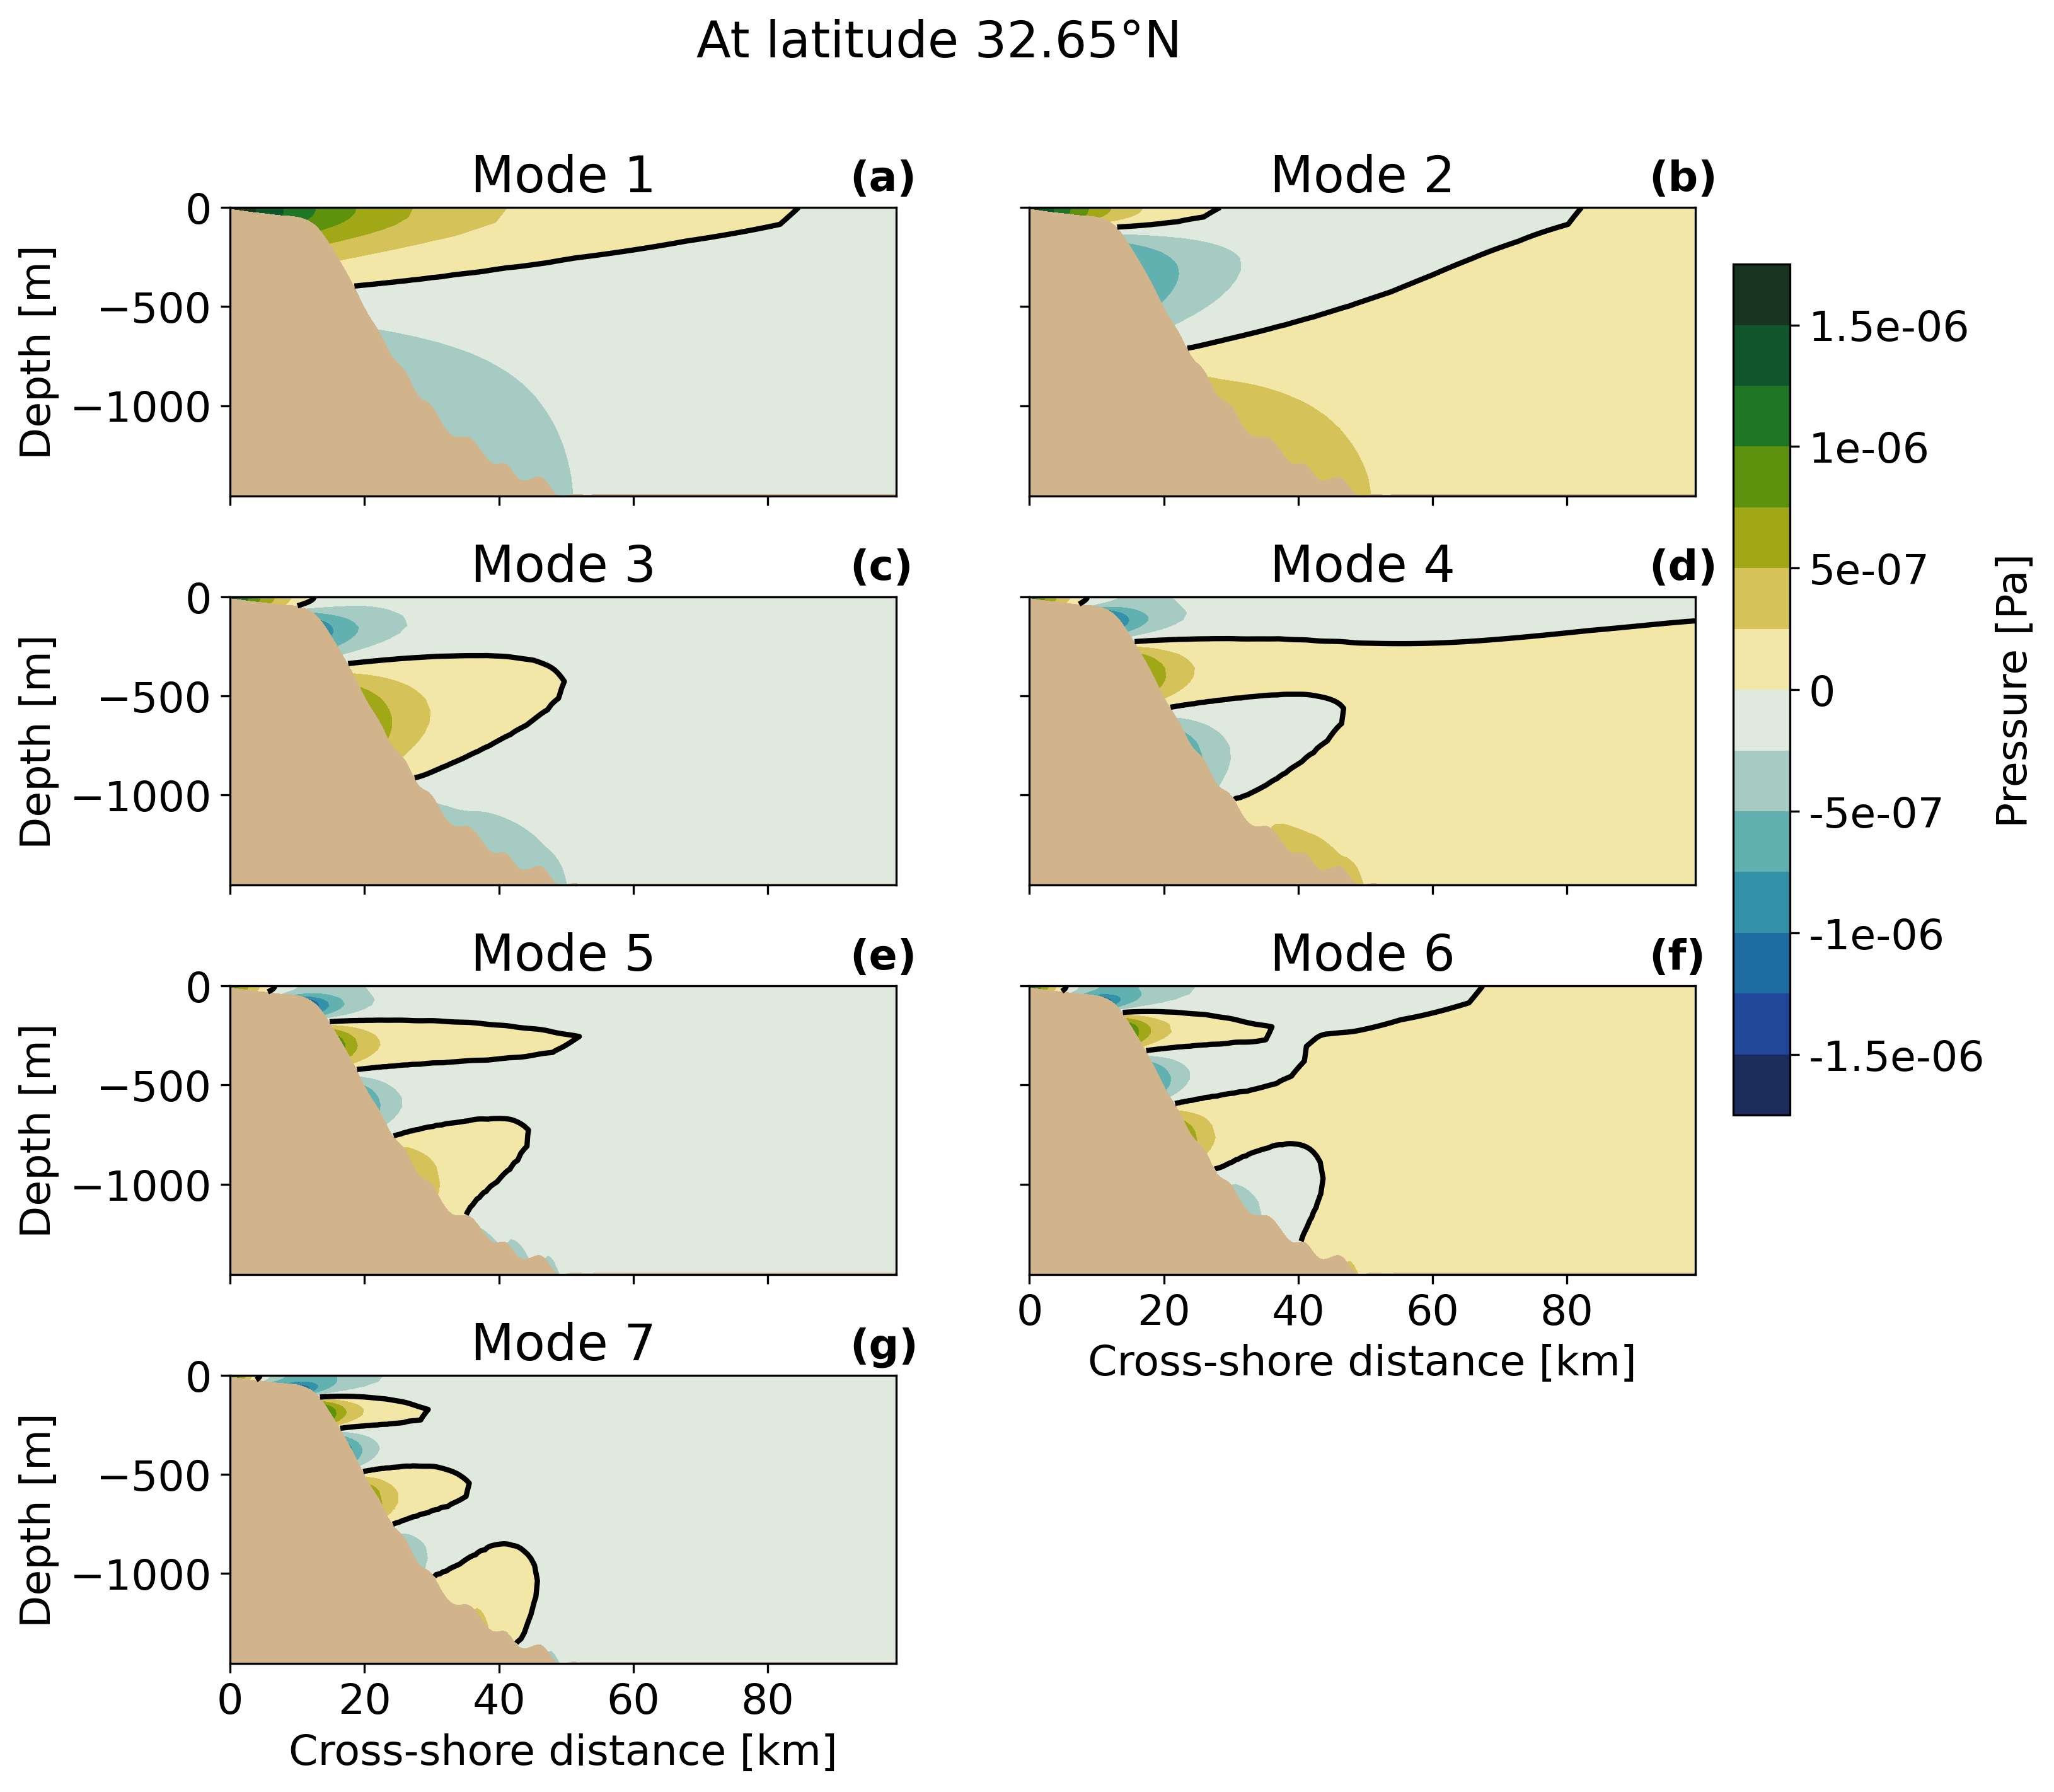

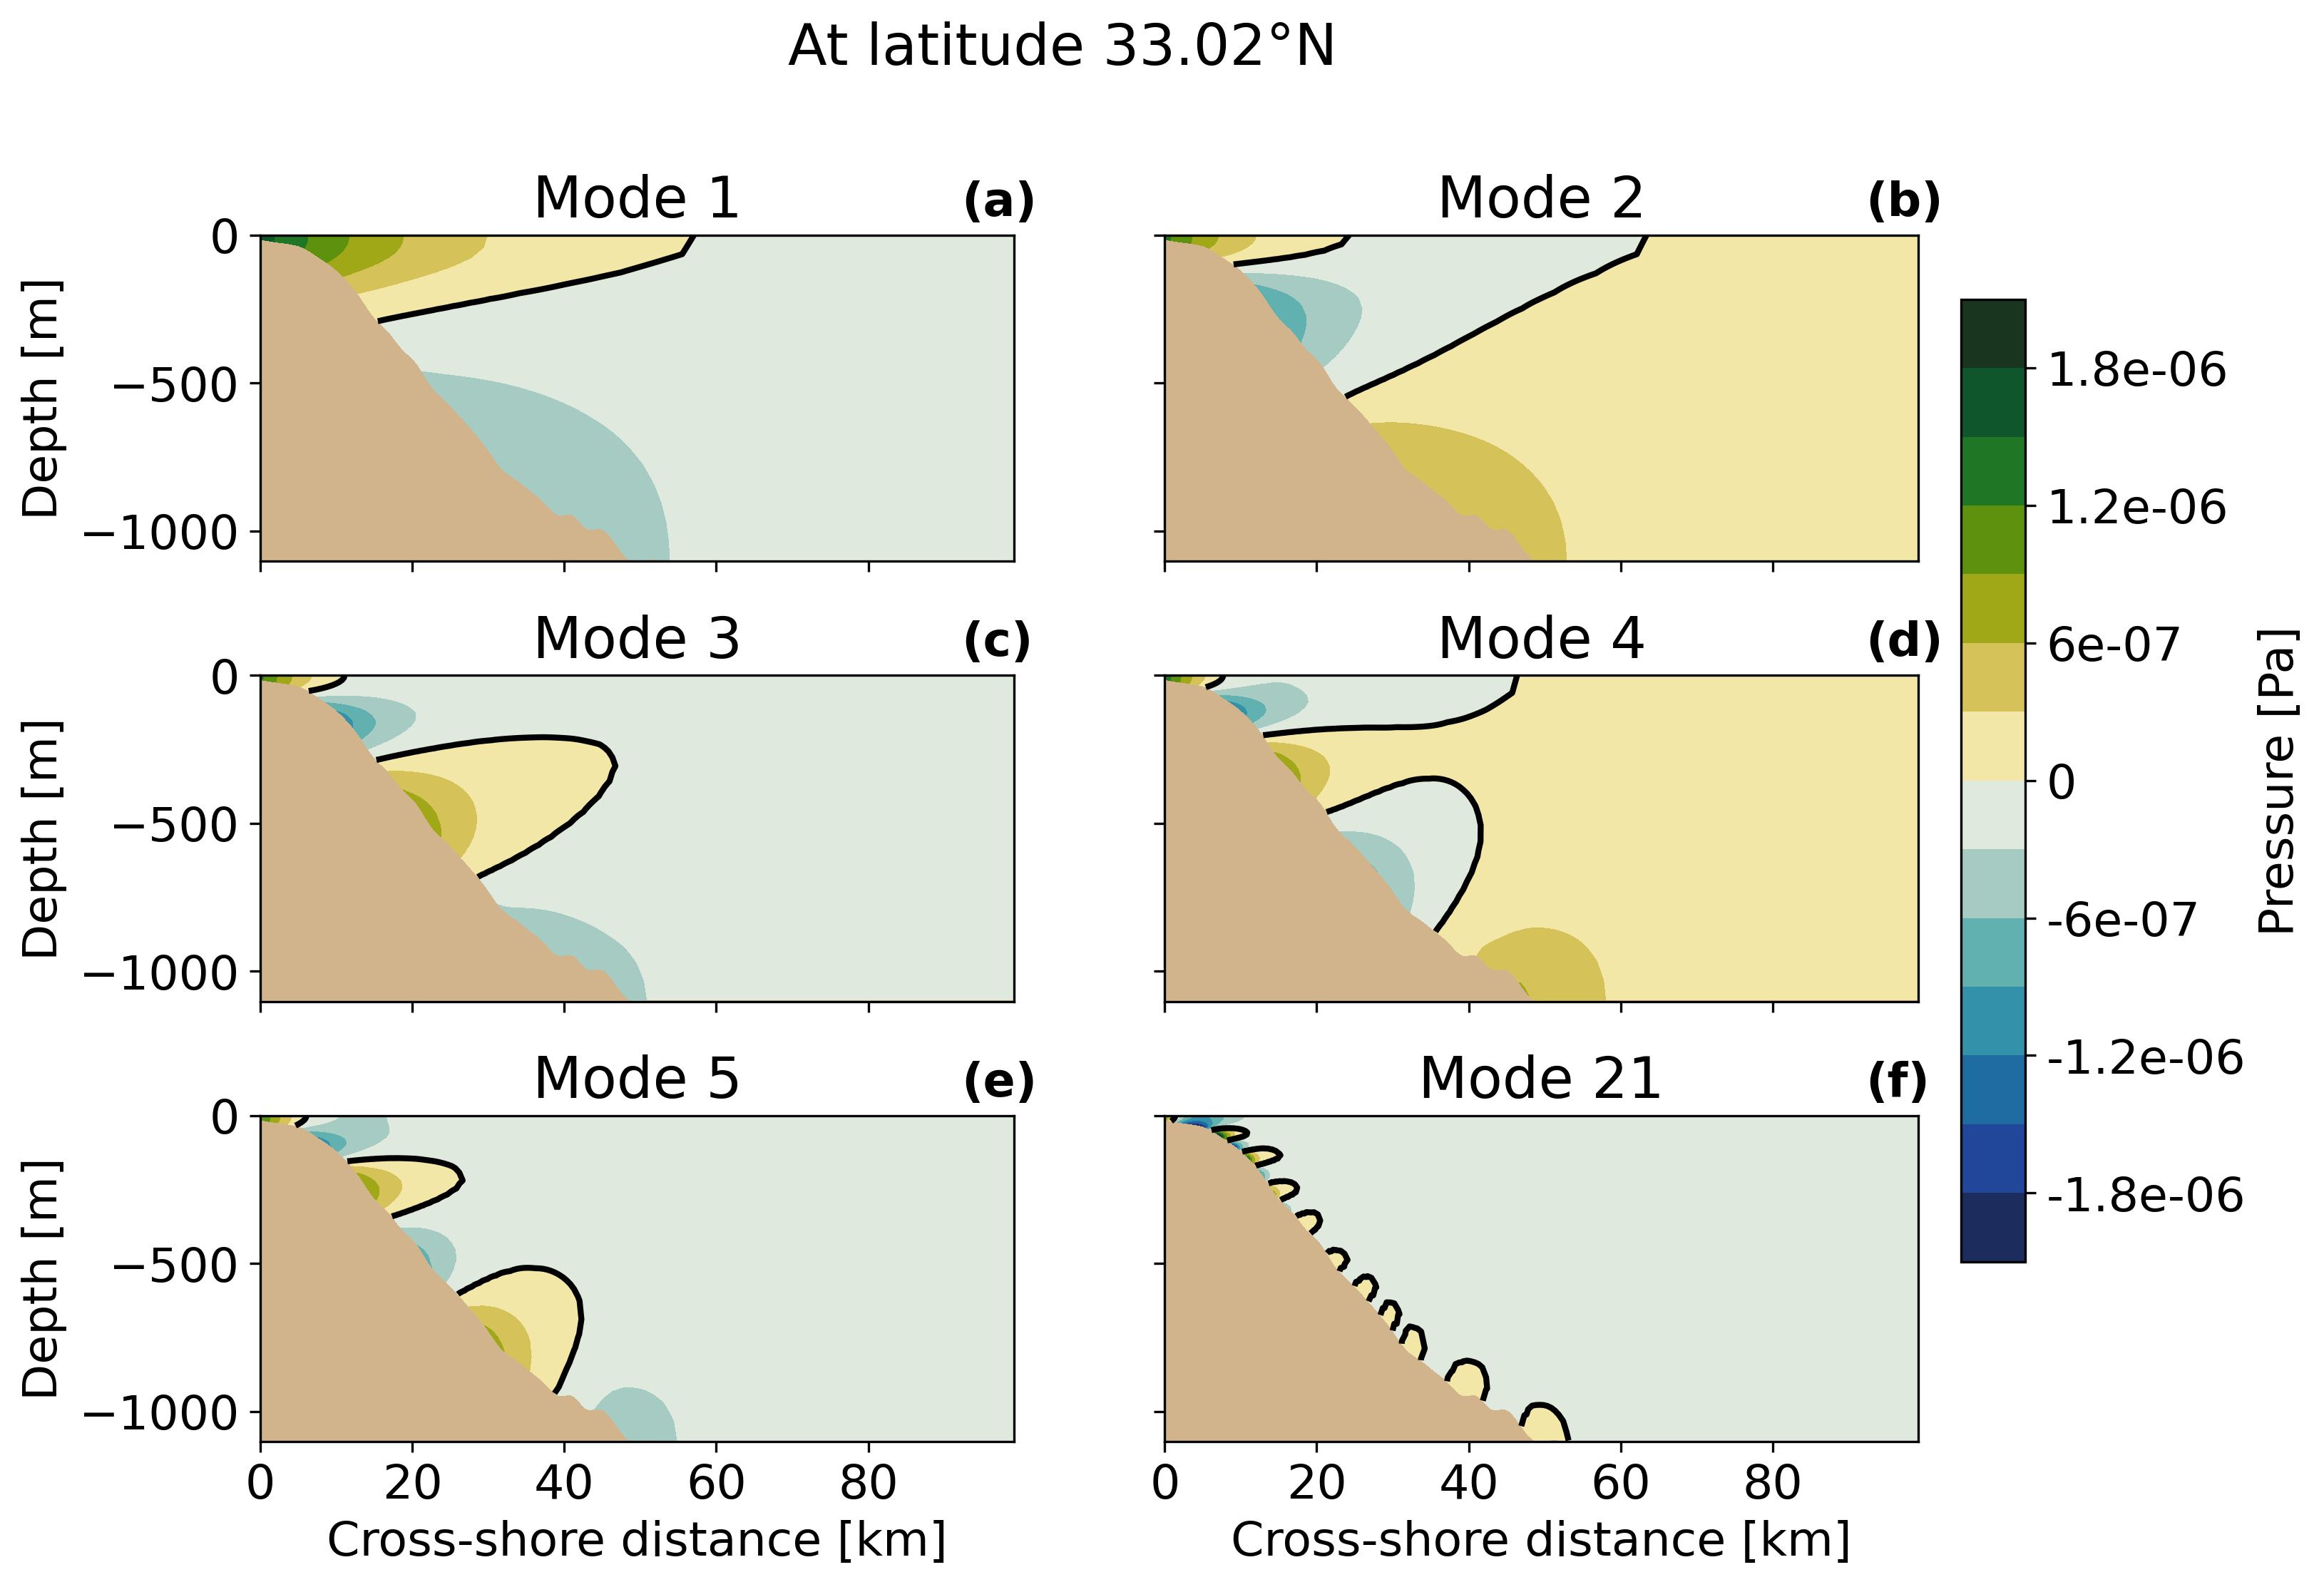

In [83]:
for ik in range(len(ds)):
    lat=corrinds[ik]


    grid_X=ds[ik].gridX.values
    grid_Z=ds[ik].gridZ.values
    VALfit=ds[ik].valfit.values
    VAL=ds[ik].valmit.values
    TIME=ds[ik].time.values

    var='PHIHYD'
    u,v,w,r,p,k,omega,epe,eke,xgr,zgr = SVBfunc.openBrink(lat,coast)

    if var == 'UVEL':
        valsin=u
        clabelB='u-Velocity [cms$^{-1}$]' 
    elif var == 'VVEL':
        valsin=v
        clabelB='v-Velocity [cms$^{-1}$]' 
    elif var == 'WVEL':
        valsin=w
        clabelB='w-Velocity [cms$^{-1}$]'
    elif var == 'PHIHYD':
        valsin=p
        clabelB='Pressure [Pa]'

    modes=0
    modenr=[]
    vals=[]
    for i in range(len(valsin)):
        if np.any(valsin[i]!=0):
            modenr.append(i)
            modes=modes+1
            if np.logical_or(var == 'WVEL',var== 'UVEL'):
                vals.append(valsin[i].imag)
            else:
                vals.append(valsin[i])



    vals=np.array(vals)

    vminb=-np.nanmax(abs(vals))
    vmaxb=np.nanmax(abs(vals))

    levelsb=np.linspace(vminb,vmaxb,15)

    xlab='Cross-shore distance [km]'
    ylab='Depth [m]'


    fig = plt.figure()
    if modes<=4:
        gs = GridSpec(nrows=2, ncols=2, height_ratios=[1,1],hspace=0.35)
    elif modes<=6:
        gs = GridSpec(nrows=3, ncols=2, height_ratios=[1,1,1],hspace=0.35)
    elif modes<=8:
        gs = GridSpec(nrows=4, ncols=2, height_ratios=[1,1,1,1],hspace=0.35)
    elif modes<=10:
        gs = GridSpec(nrows=5, ncols=2, height_ratios=[1,1,1,1,1],hspace=0.35)
    
    if ik==0:
        modes=modes+1
    
    
    for i in np.arange(0,modes-1,1):
            if i<=1:
                ax = fig.add_subplot(gs[0, i])
                if i==1:
                    ax.text(0.93, 1.06, '(b)', fontweight='bold', color='k', 
                    transform=ax.transAxes)
                else:
                    ax.text(0.93, 1.06, '(a)', fontweight='bold', color='k', 
                    transform=ax.transAxes)
            elif i<=3:
                ax = fig.add_subplot(gs[1, i-2])
                if i ==2:
                    ax.text(0.93, 1.06, '(c)', fontweight='bold', color='k', 
                    transform=ax.transAxes)
                else: 
                    ax.text(0.93, 1.06, '(d)', fontweight='bold', color='k', 
                    transform=ax.transAxes)
            elif i<=5:
                ax = fig.add_subplot(gs[2, i-4])
                if i==4:
                    ax.text(0.93, 1.06, '(e)', fontweight='bold', color='k', 
                    transform=ax.transAxes)
                else:
                    ax.text(0.93, 1.06, '(f)', fontweight='bold', color='k', 
                    transform=ax.transAxes)
            elif i<=7:
                ax = fig.add_subplot(gs[3, i-6])
                if i==6:
                    ax.text(0.93, 1.06, '(g)', fontweight='bold', color='k', 
                    transform=ax.transAxes)
                else:
                    ax.text(0.93, 1.06, '(h)', fontweight='bold', color='k', 
                    transform=ax.transAxes)
            elif i<=9:
                ax = fig.add_subplot(gs[4, i-8])
                if i==8:
                    ax.text(0.93, 1.06, '(i)', fontweight='bold', color='k', 
                    transform=ax.transAxes)
                else:
                    ax.text(0.93, 1.06, '(j)', fontweight='bold', color='k', 
                    transform=ax.transAxes)
            if ik==0:
                cax2=SVBfunc.plotbrink(ax,xgr,zgr,levelsb,xlab,ylab,modenr[i],i,vals[i],modes,lat,day1)
            else: 
                cax2=SVBfunc.plotbrink(ax,xgr,zgr,levelsb,xlab,ylab,modenr[i+1],i,vals[i+1],modes,lat,day1)

    cbar_ax = fig.add_axes([0.92, 0.4, 0.03, 0.45])
    fig.colorbar(cax2, cax=cbar_ax)
    cbar_ax.set_ylabel(clabelB)
    cbar_ax.yaxis.set_major_formatter(FormatStrFormatter('%.2g'))
    plt.suptitle('At latitude ' + str(lat) + '°N')

    plt.savefig(str(coast)+'/Figures/BrinkOutput'+ str(lat) +'.png')

In [109]:
modenr

[0, 1, 2, 3, 4, 5, 6, 10]

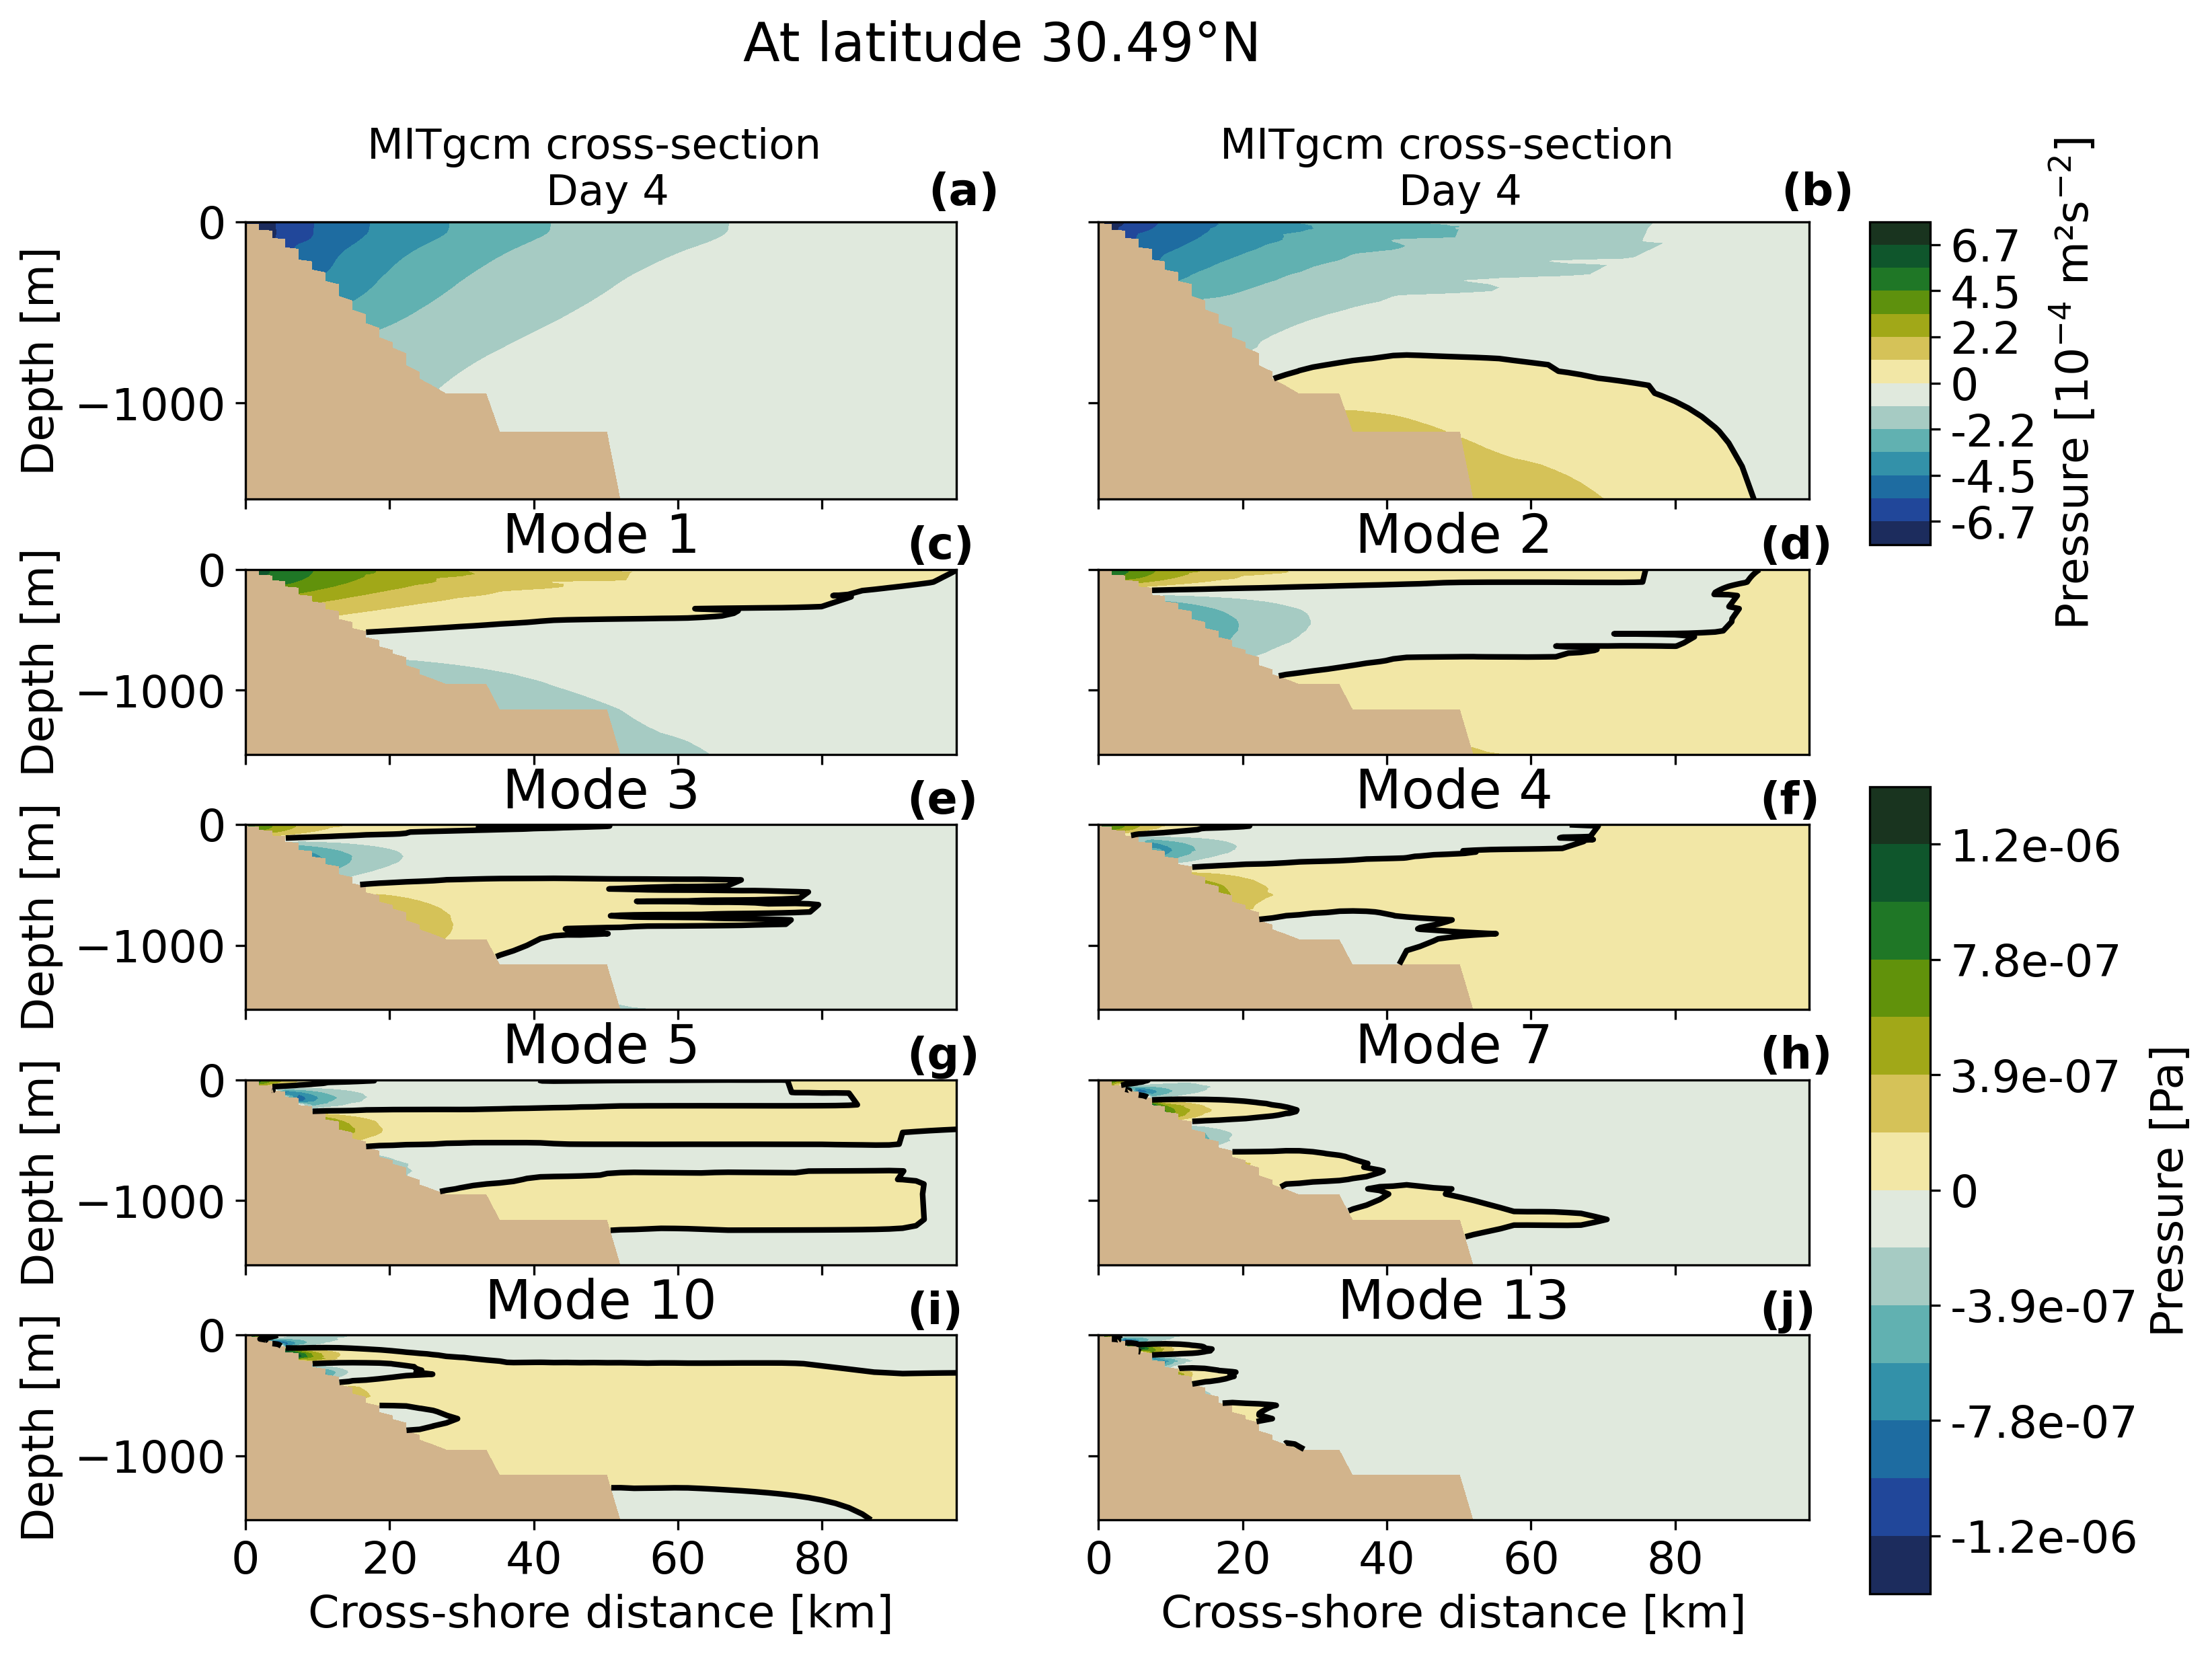

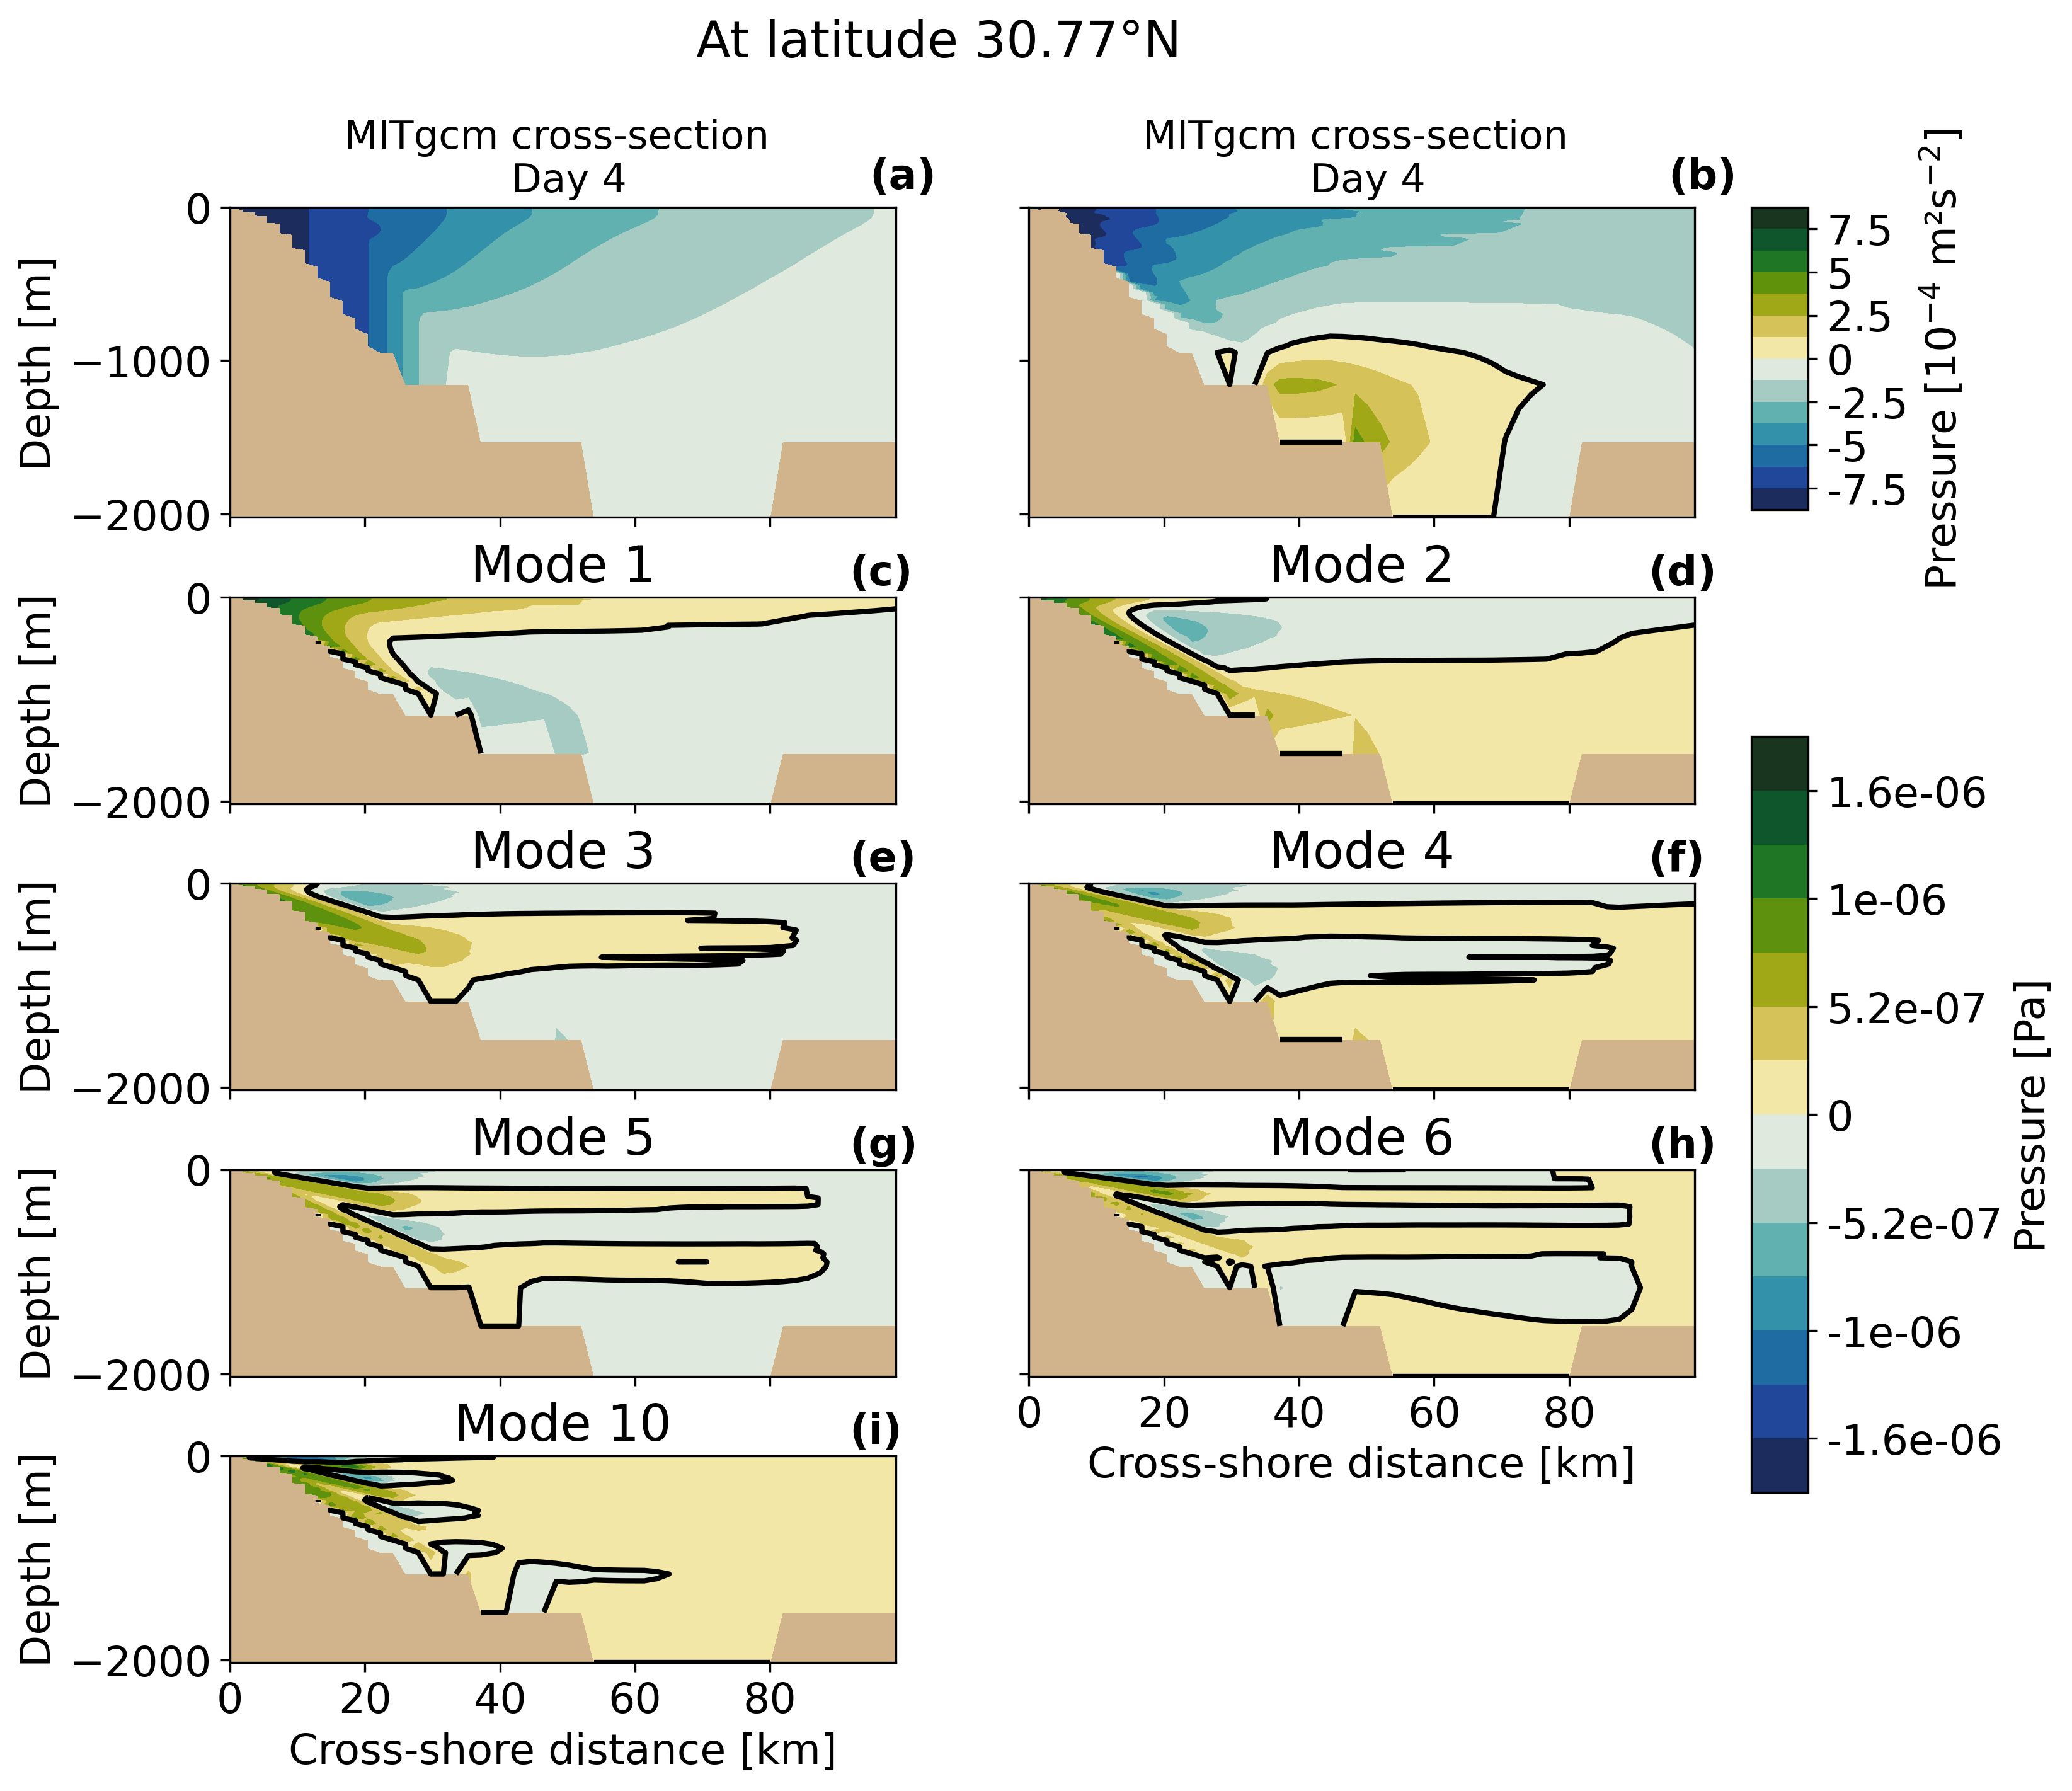

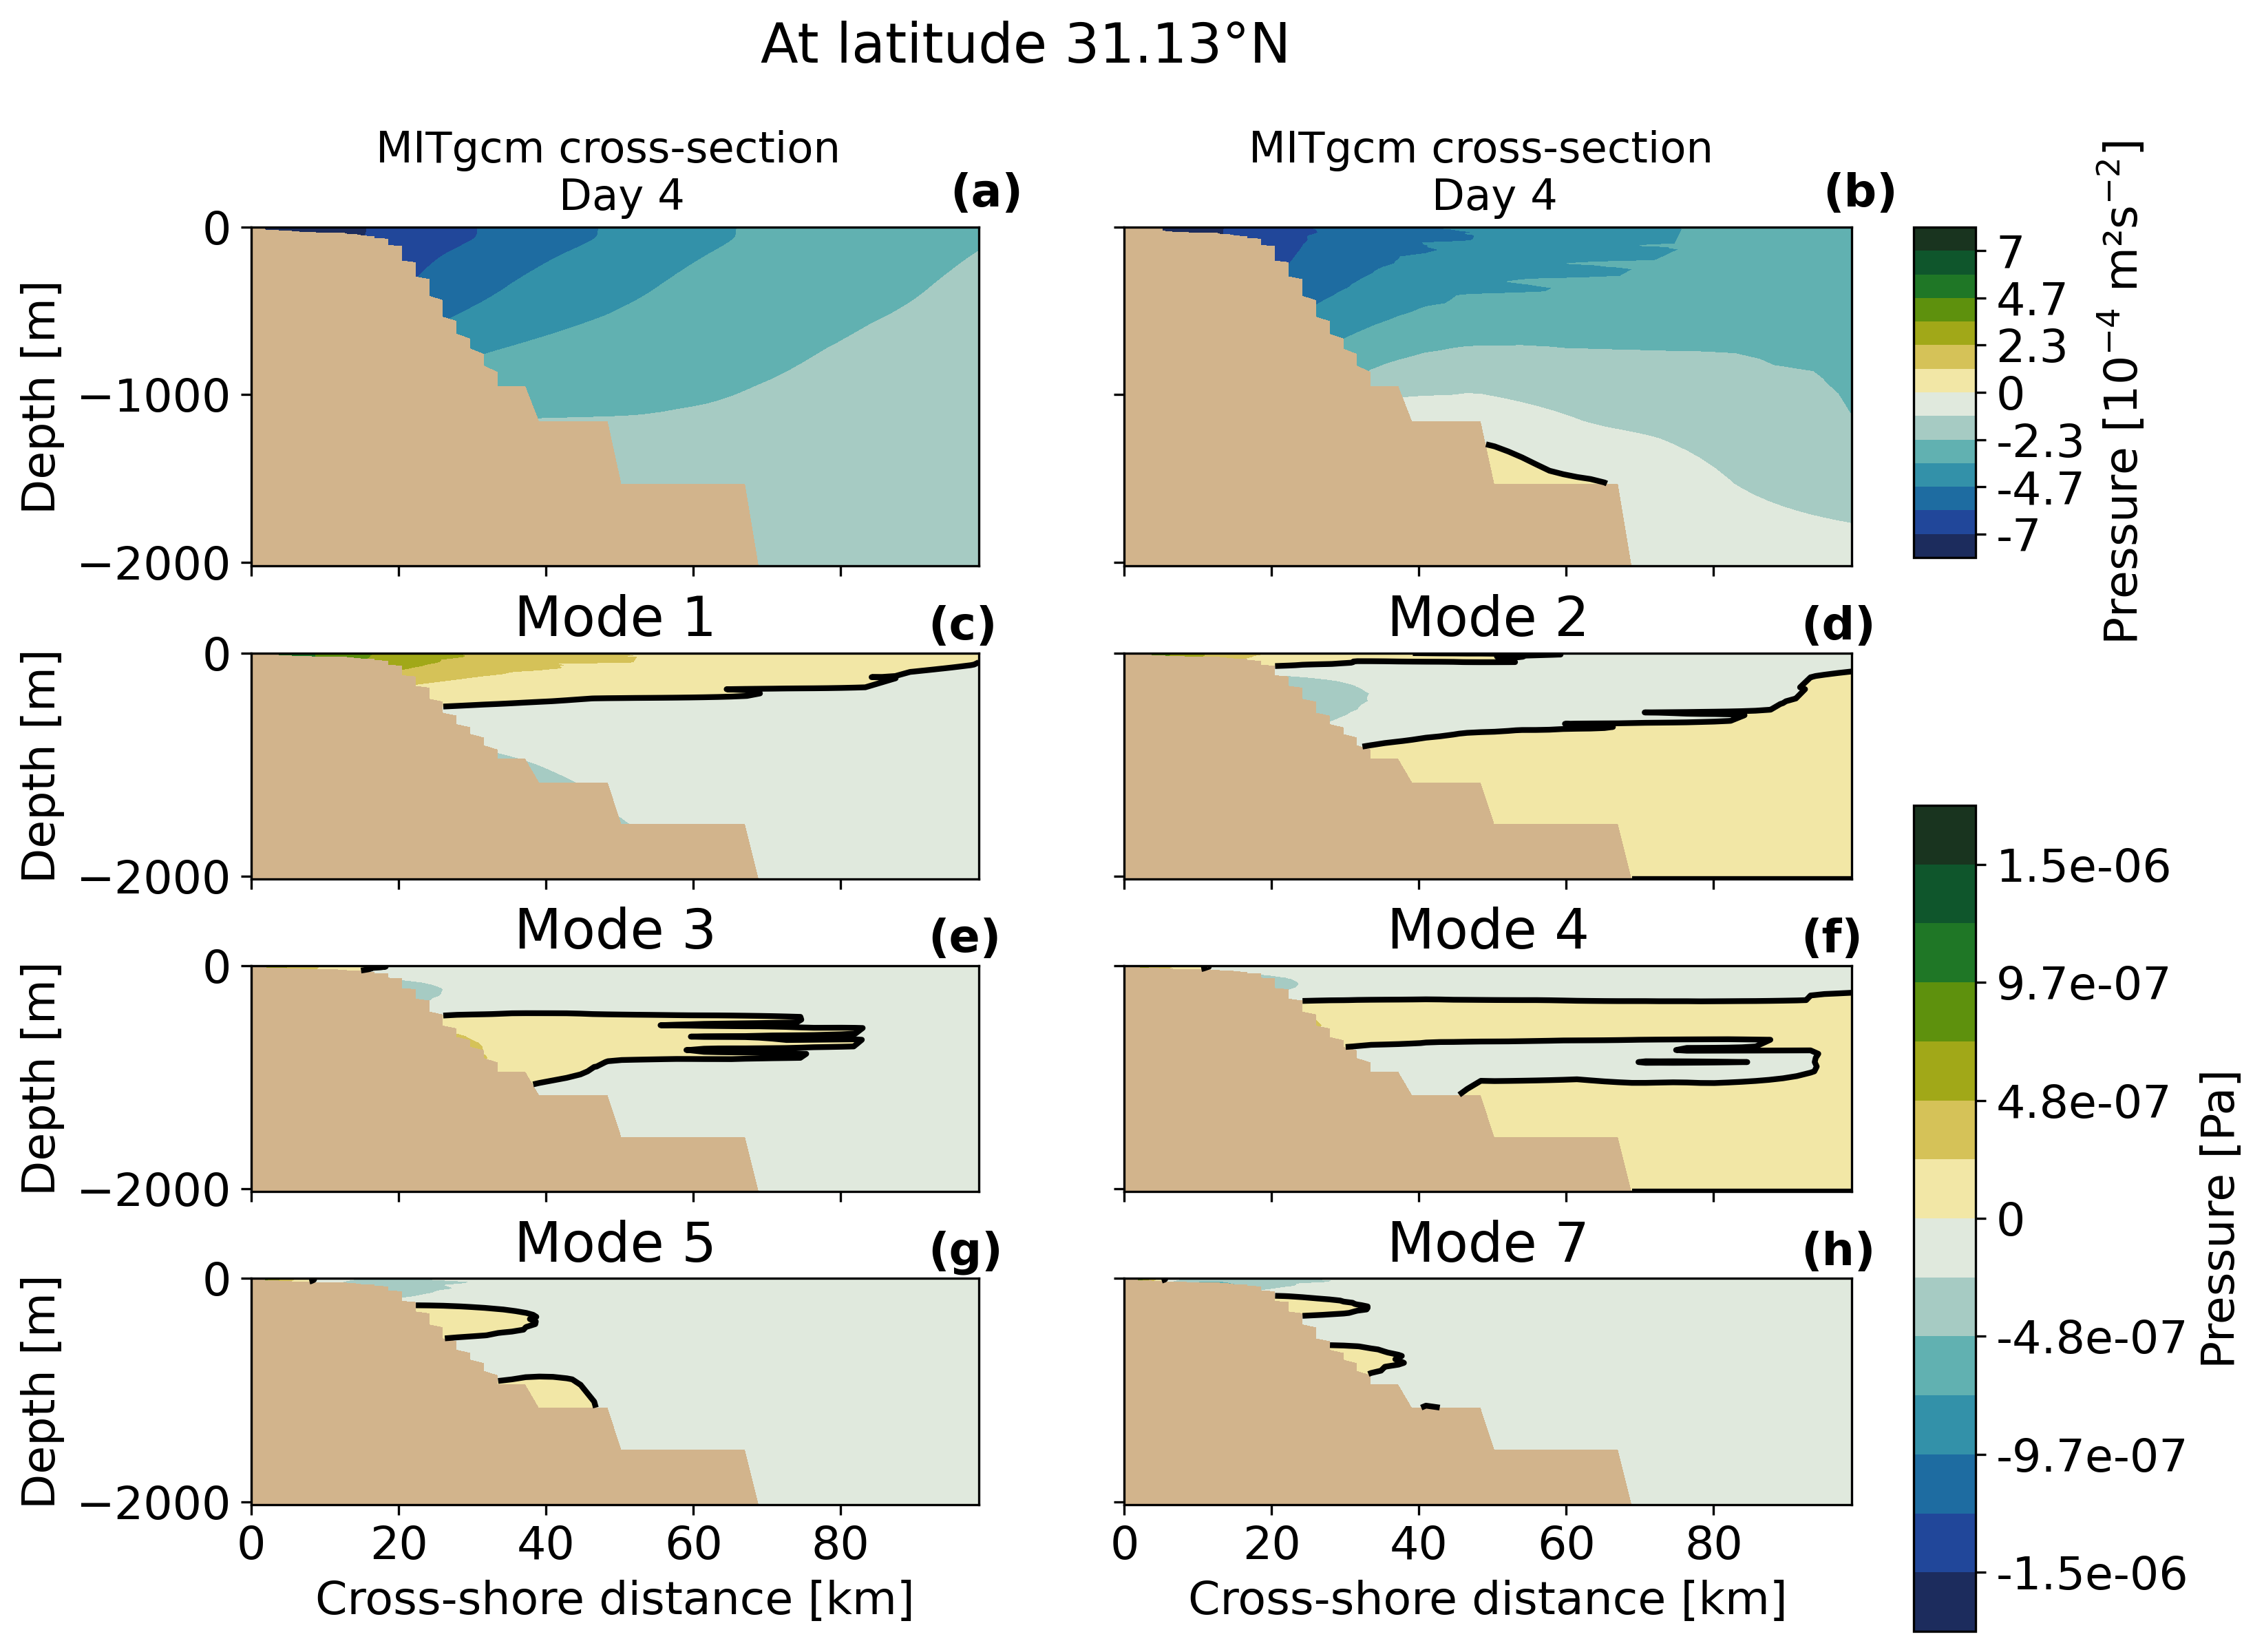

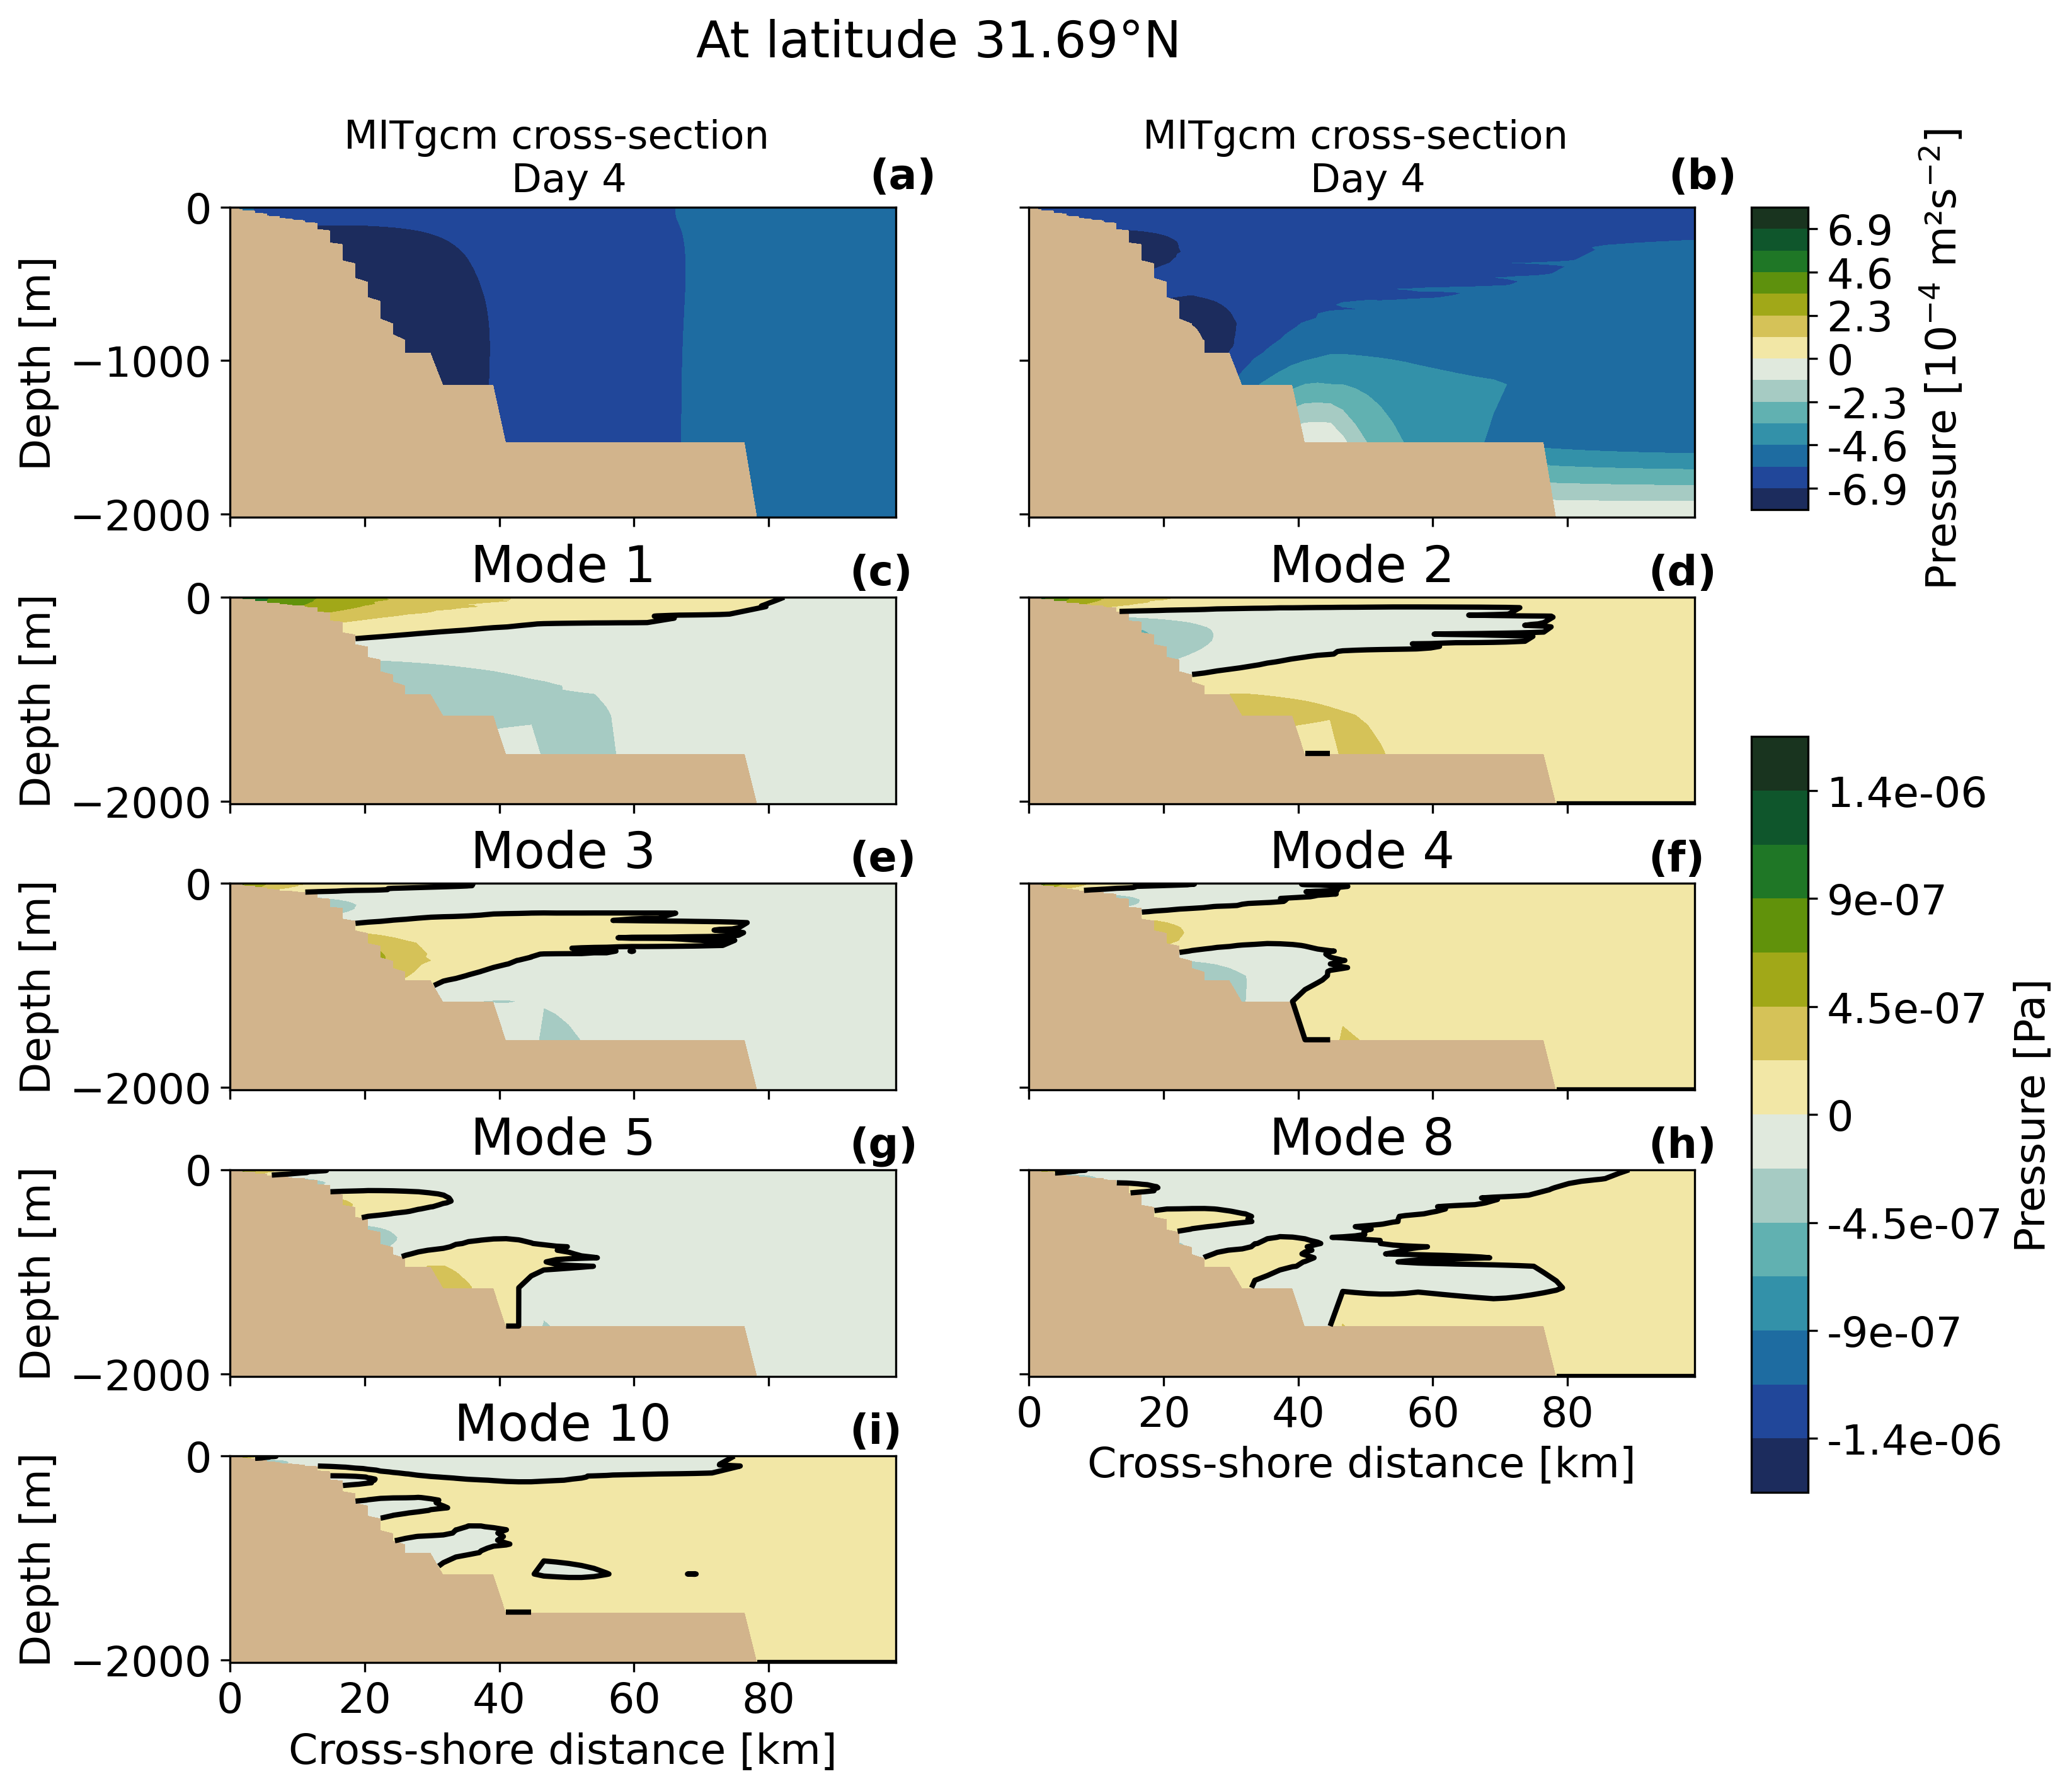

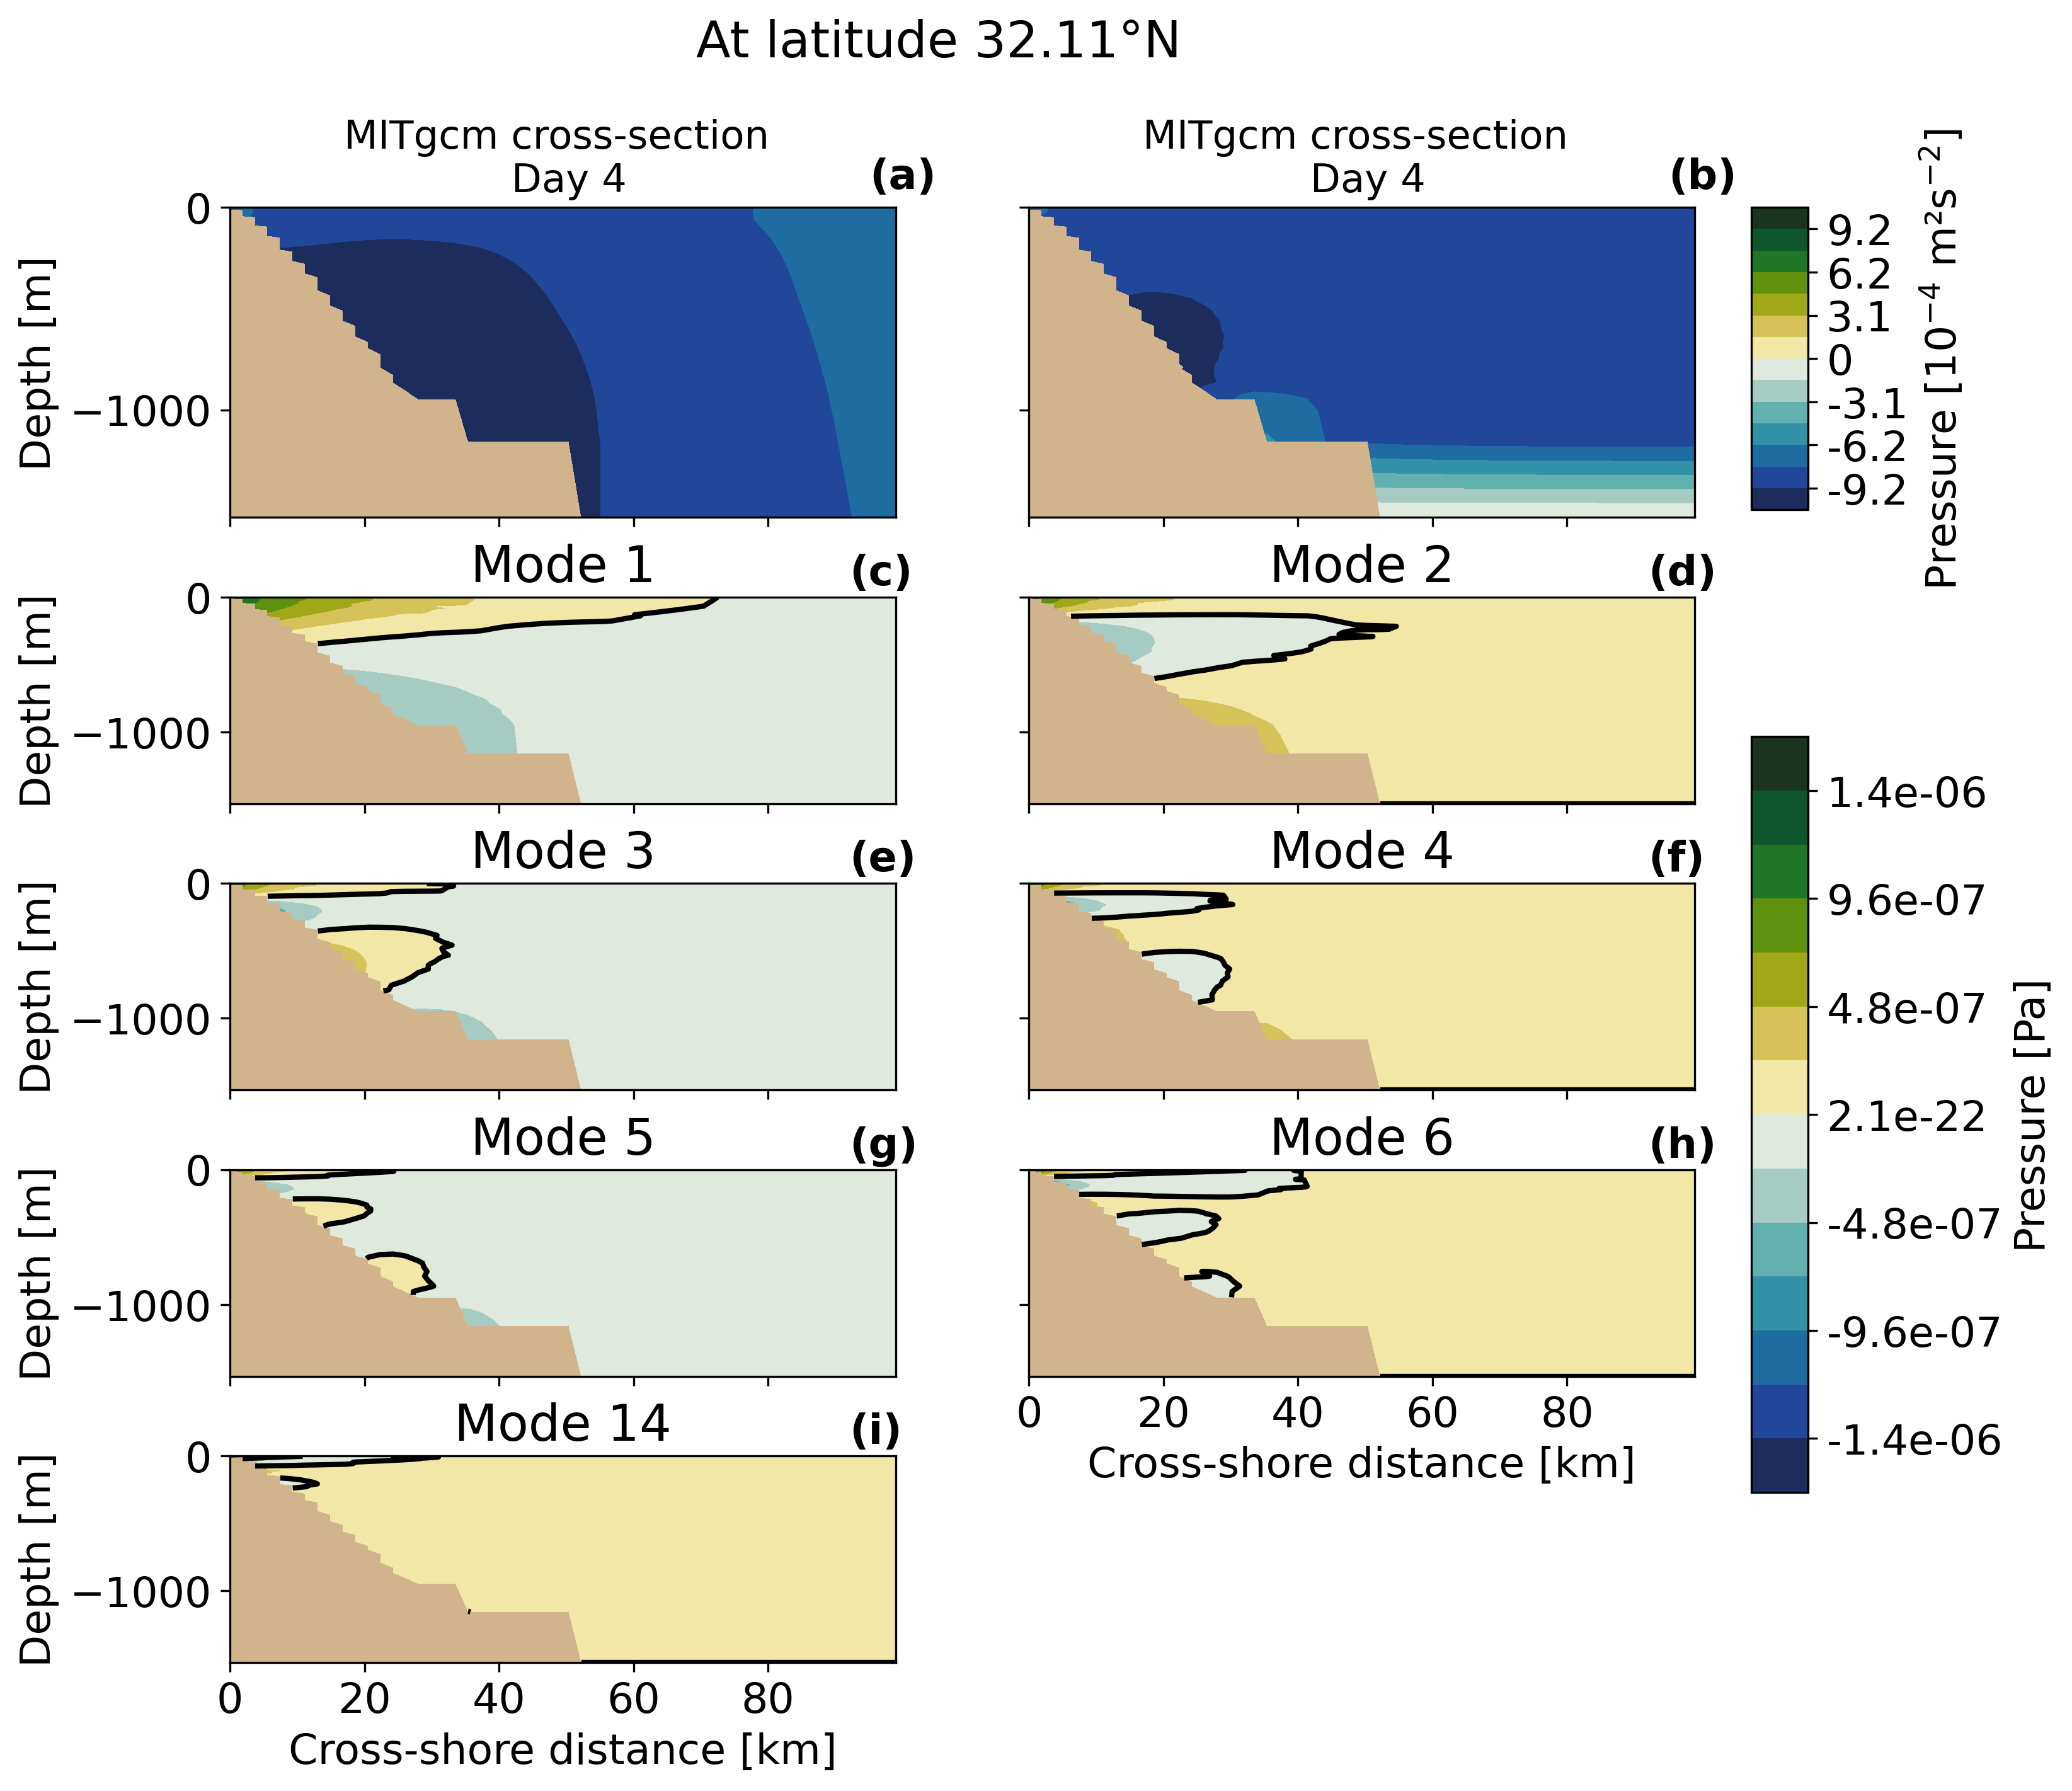

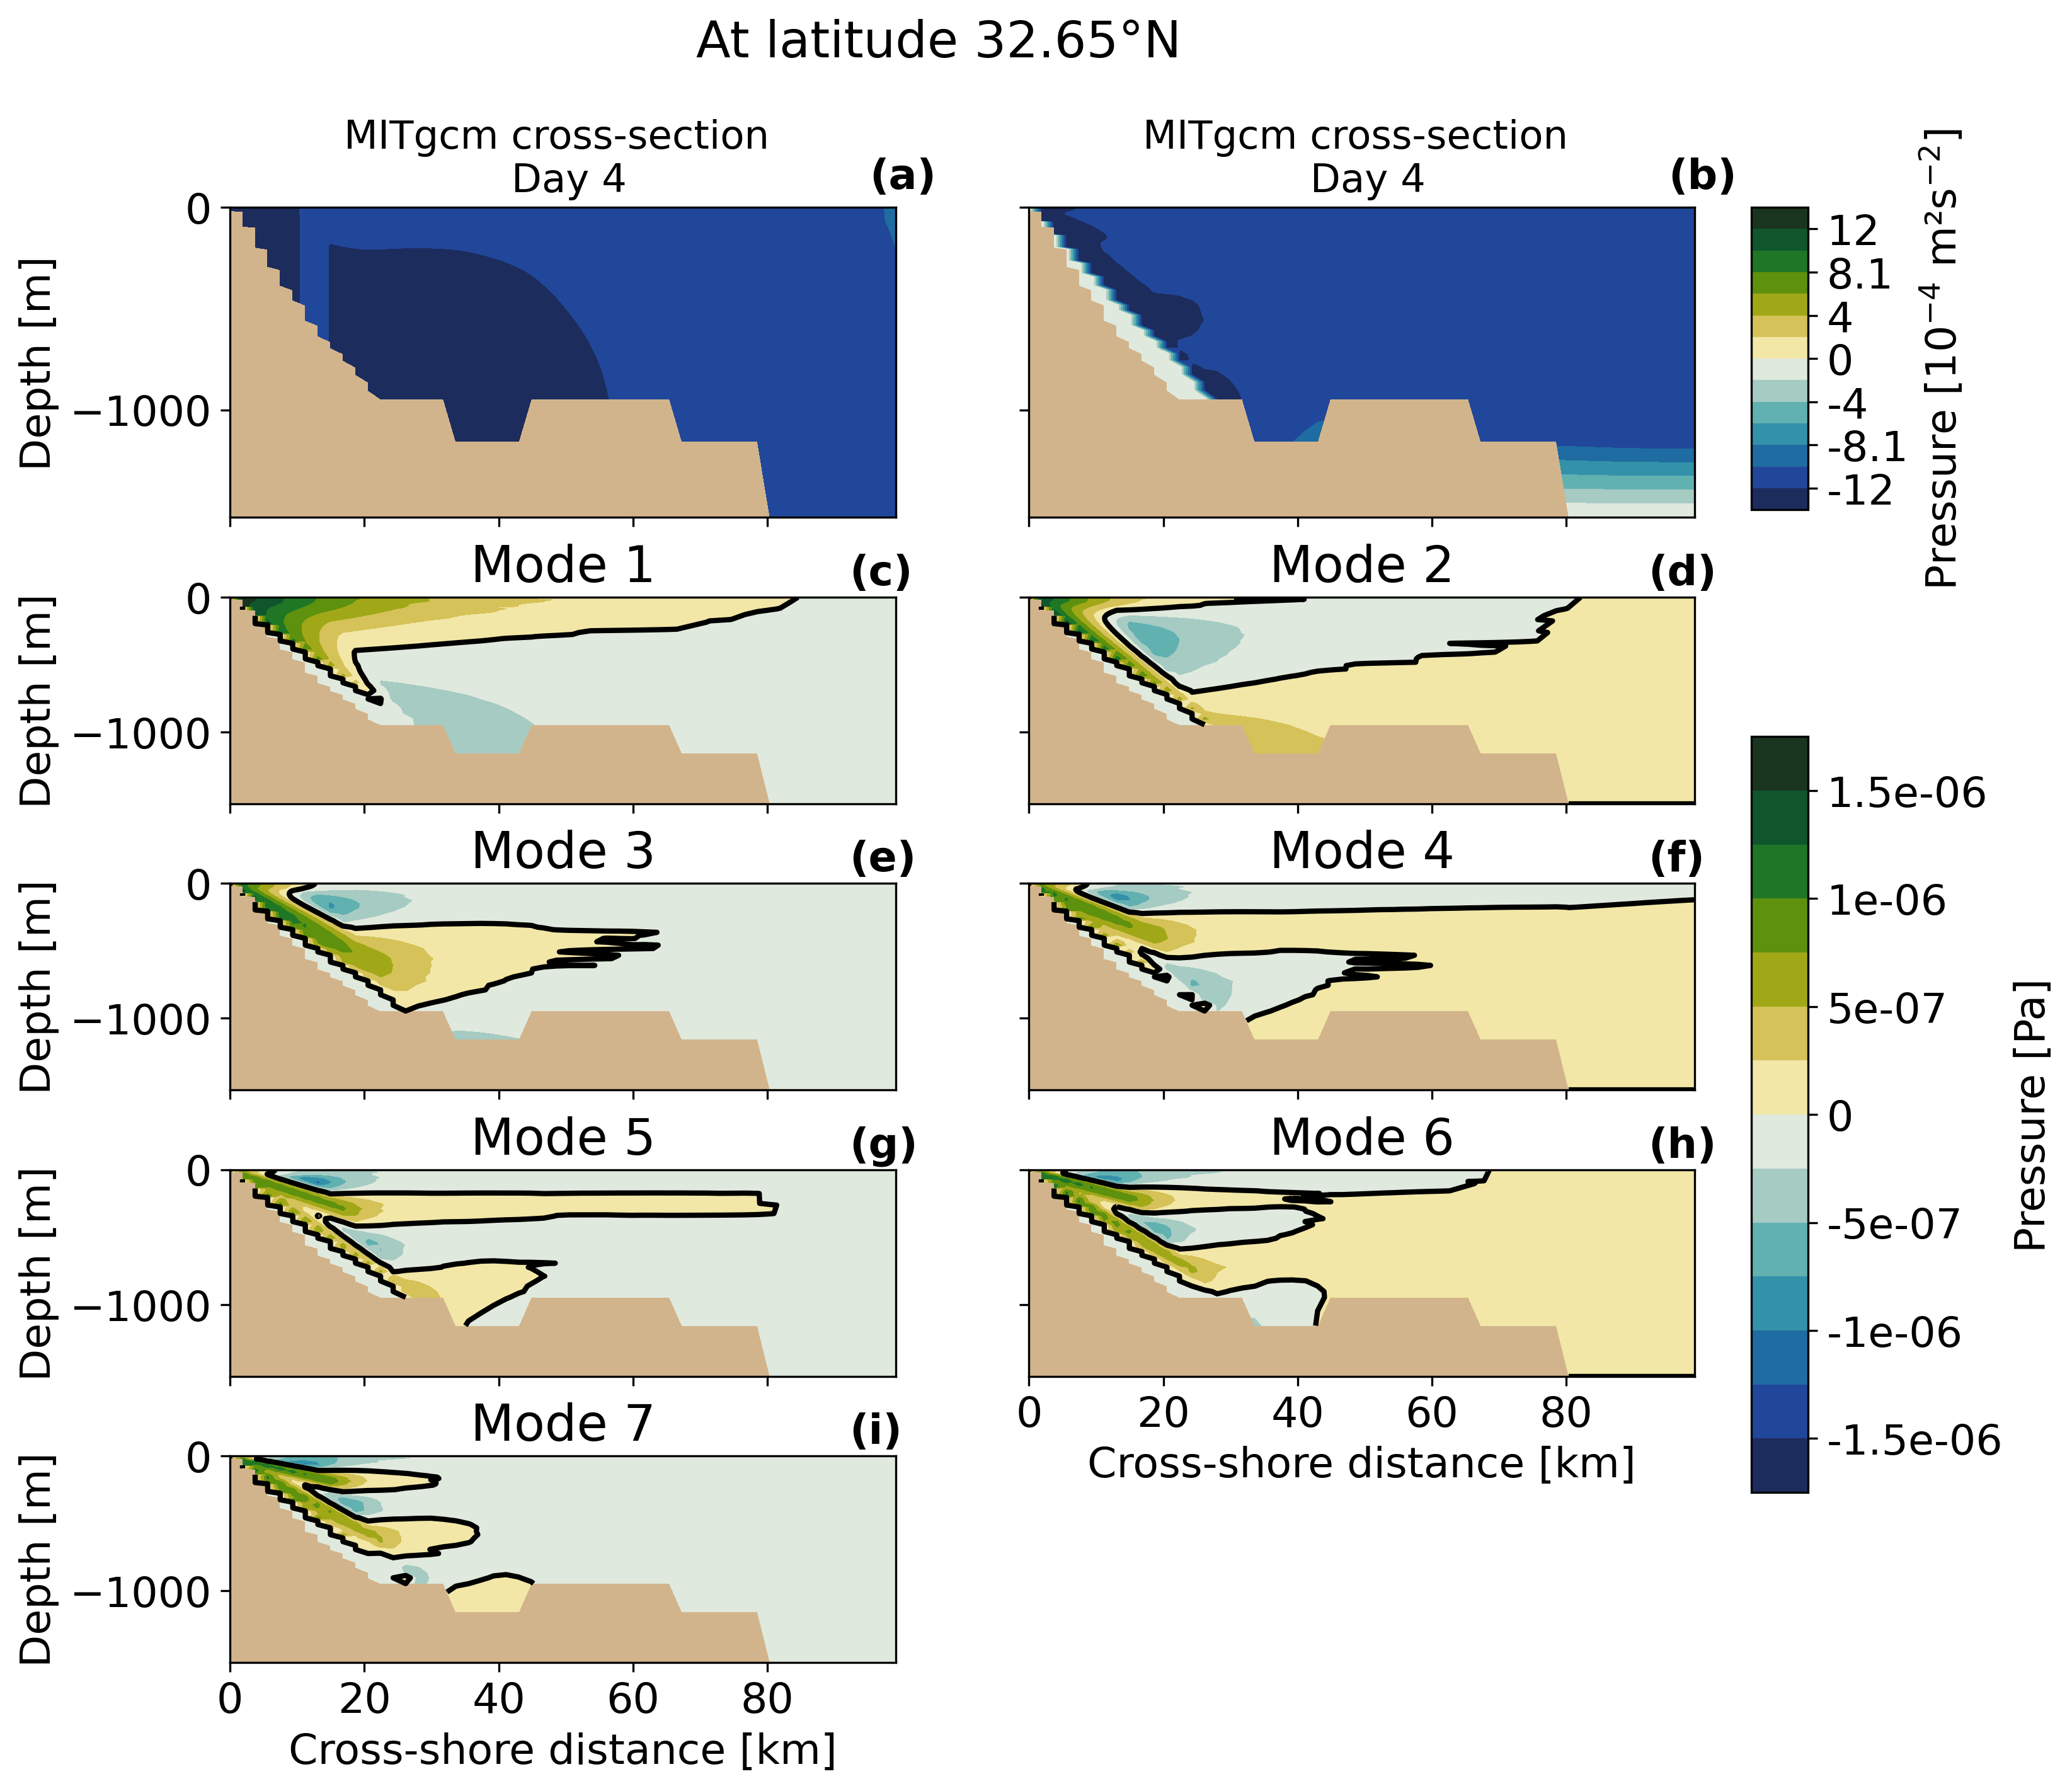

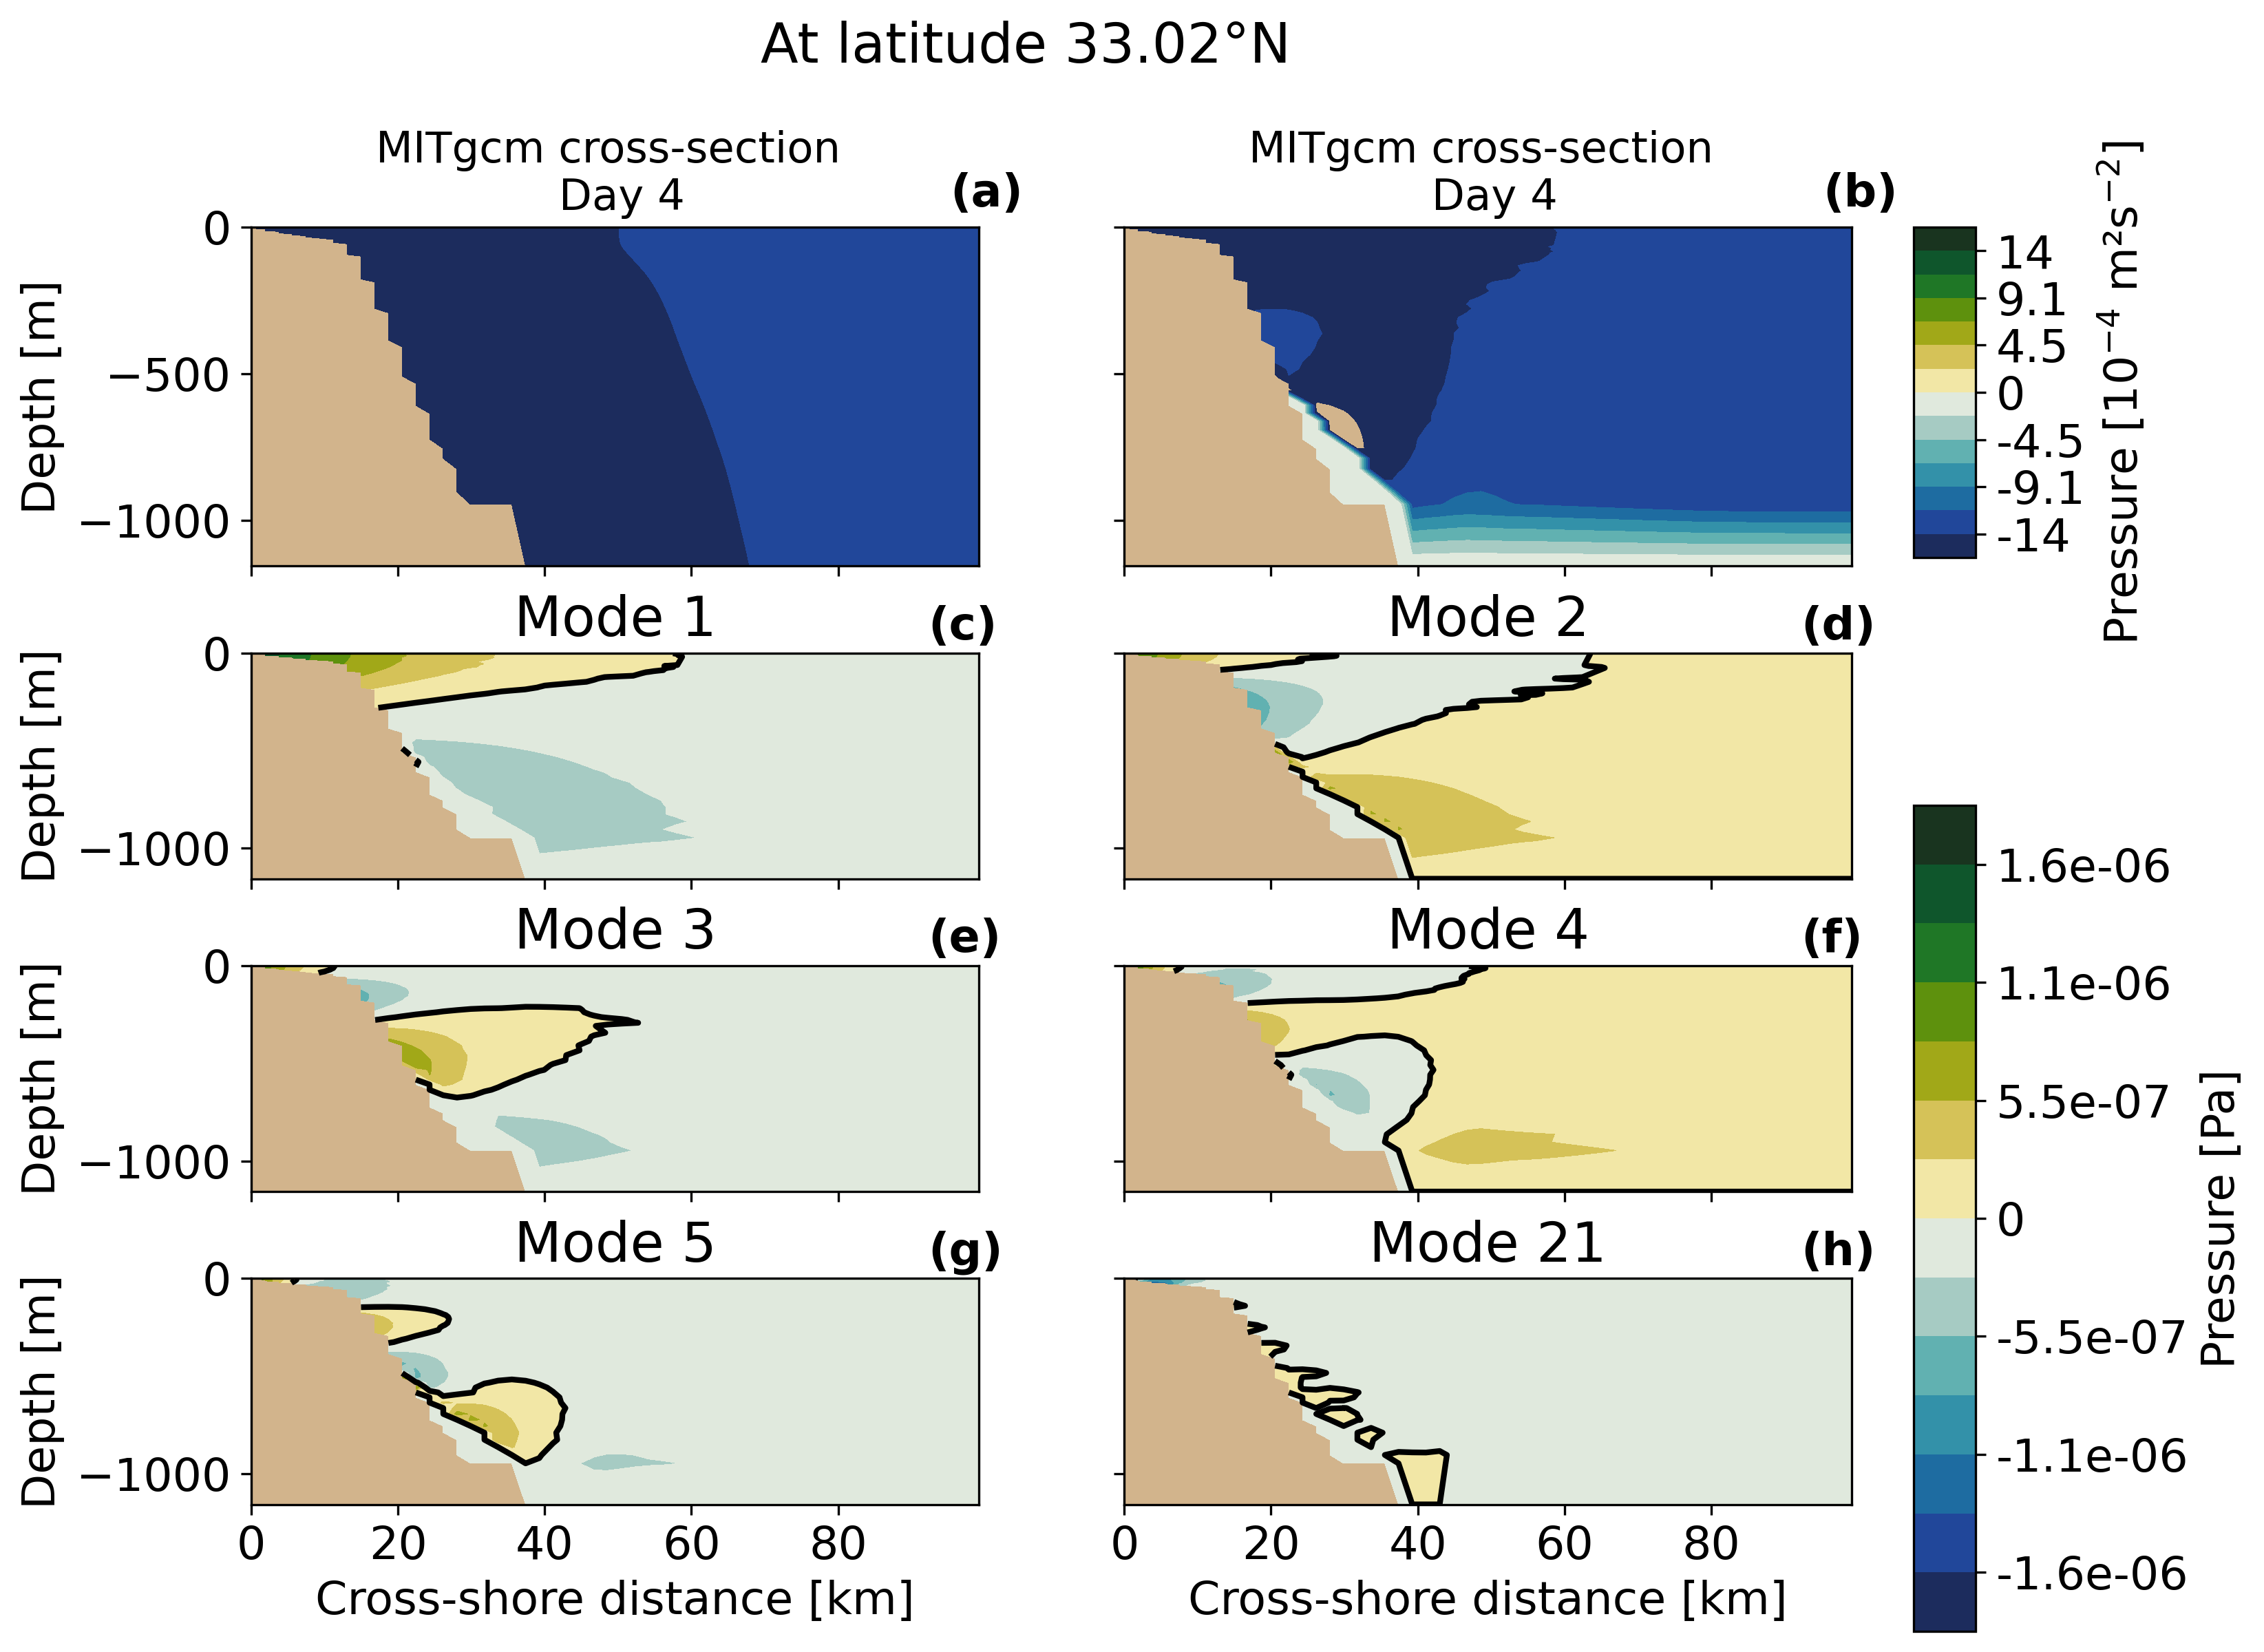

In [114]:
for ik in range(len(ds)):

    lat=corrinds[ik]
    
    grid_X=ds[ik].gridX.values
    grid_Z=ds[ik].gridZ.values
    VALfit=ds[ik].valfit.values
    VAL=ds[ik].valmit.values
    TIME=ds[ik].time.values
    
    mask=maskin[:,indYlat,indXlon]
    indXlon,indYlat=matfile['indexXlon'][ik],matfile['indexYlat'][ik]

    var='PHIHYD'
    u,v,w,r,p,k,omega,epe,eke,xgr,zgr = SVBfunc.openBrink(lat,coast)

    if var == 'UVEL':
        valsin=u
        clabelB='u-Velocity [cms$^{-1}$]' 
    elif var == 'VVEL':
        valsin=v
        clabelB='v-Velocity [cms$^{-1}$]' 
    elif var == 'WVEL':
        valsin=w
        clabelB='w-Velocity [cms$^{-1}$]'
    elif var == 'PHIHYD':
        valsin=p
        clabelB='Pressure [Pa]'

    modes=0
    modenr=[]
    vals=[]
    for i in range(len(valsin)):
        if np.any(valsin[i]!=0):
            modenr.append(i)
            modes=modes+1

    if ik==0:
        modes=modes+1
    
    vals=ds[ik].varbrink.values


    vminb=-np.nanmax(abs(vals))
    vmaxb=np.nanmax(abs(vals))

    levelsb=np.linspace(vminb,vmaxb,15)

    vmin=-np.nanmax(abs(VAL[t]))*1e4
    vmax=np.nanmax(abs(VAL[t]))*1e4

    levels=np.linspace(vmin,vmax,15)

    xlab='Cross-shore distance [km]'
    ylab='Depth [m]'


    fig = plt.figure()
    if modes<=4:
        gs = GridSpec(nrows=3, ncols=2, height_ratios=[1.5,1,1],hspace=0.35)
    elif modes<=6:
        gs = GridSpec(nrows=4, ncols=2, height_ratios=[1.5,1,1,1],hspace=0.35)
    elif modes<=8:
        gs = GridSpec(nrows=5, ncols=2, height_ratios=[1.5,1,1,1,1],hspace=0.35)
    elif modes<=10:
        gs = GridSpec(nrows=6, ncols=2, height_ratios=[1.5,1,1,1,1,1],hspace=0.35)



    ax = fig.add_subplot(gs[0, 0])

    cax1=SVBfunc.plotbrink(ax,grid_X,grid_Z,levels,xlab,ylab,-1,-1,np.ma.masked_array(VAL[t]*1e4,mask=mask),modes,lat,day1)
    ax.set_ylim([np.min(np.ma.masked_array(grid_Z,mask=mask)),0])
    ax.text(0.96, 1.06, '(a)', fontweight='bold', color='k', 
                transform=ax.transAxes)


    ax = fig.add_subplot(gs[0, 1],sharey=ax)
    cax1=SVBfunc.plotbrink(ax,grid_X,grid_Z,levels,xlab,ylab,-2,-2,np.ma.masked_array(VALfit[t]*1e4,mask=mask),modes,lat,day1)

    cbar_ax1 = fig.add_axes([0.93, 0.72, 0.03, 0.16])
    fig.colorbar(cax1, cax=cbar_ax1)
    cbar_ax1.set_ylabel('Pressure [$10^{-4}$ m²s$^{-2}$]')
    cbar_ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2g'))

    ax.text(0.96, 1.06, '(b)', fontweight='bold', color='k', 
                transform=ax.transAxes)


    for i in np.arange(0,modes-1,1):
            if i<=1:
                ax = fig.add_subplot(gs[1, i])
                if i==1:
                    ax.text(0.93, 1.06, '(d)', fontweight='bold', color='k', 
                    transform=ax.transAxes)
                else:
                    ax.text(0.93, 1.06, '(c)', fontweight='bold', color='k', 
                    transform=ax.transAxes)
            elif i<=3:
                ax = fig.add_subplot(gs[2, i-2])
                if i ==2:
                    ax.text(0.93, 1.06, '(e)', fontweight='bold', color='k', 
                    transform=ax.transAxes)
                else: 
                    ax.text(0.93, 1.06, '(f)', fontweight='bold', color='k', 
                    transform=ax.transAxes)
            elif i<=5:
                ax = fig.add_subplot(gs[3, i-4])
                if i==4:
                    ax.text(0.93, 1.06, '(g)', fontweight='bold', color='k', 
                    transform=ax.transAxes)
                else:
                    ax.text(0.93, 1.06, '(h)', fontweight='bold', color='k', 
                    transform=ax.transAxes)
            elif i<=7:
                ax = fig.add_subplot(gs[4, i-6])
                if i==6:
                    ax.text(0.93, 1.06, '(i)', fontweight='bold', color='k', 
                    transform=ax.transAxes)
                else:
                    ax.text(0.93, 1.06, '(j)', fontweight='bold', color='k', 
                    transform=ax.transAxes)
            elif i<=9:
                ax = fig.add_subplot(gs[5, i-8])
                if i==6:
                    ax.text(0.93, 1.06, '(k)', fontweight='bold', color='k', 
                    transform=ax.transAxes)
                else:
                    ax.text(0.93, 1.06, '(l)', fontweight='bold', color='k', 
                    transform=ax.transAxes)
            if ik==0:
                cax2=SVBfunc.plotbrink(ax,grid_X,grid_Z,levelsb,xlab,ylab,modenr[i],i,np.ma.masked_array(vals[i],mask=mask),modes,lat,day1)
            else: 
                cax2=SVBfunc.plotbrink(ax,grid_X,grid_Z,levelsb,xlab,ylab,modenr[i+1],i,np.ma.masked_array(vals[i],mask=mask),modes,lat,day1)
            ax.set_ylim([np.min(np.ma.masked_array(grid_Z,mask=mask)),0])
    cbar_ax = fig.add_axes([0.93, 0.2, 0.03, 0.4])
    fig.colorbar(cax2, cax=cbar_ax)
    cbar_ax.set_ylabel(clabelB)
    cbar_ax.yaxis.set_major_formatter(FormatStrFormatter('%.2g'))
    plt.suptitle('At latitude ' + str(lat) + '°N')

    plt.savefig(str(coast)+'/Figures/FittedInterp'+ str(lat) +'.png')